In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame

customersDf = pd.read_csv("brazilian-ecommerce/olist_customers_dataset.csv")
geolocationDf = pd.read_csv("brazilian-ecommerce/olist_geolocation_dataset.csv")
itemsDf = pd.read_csv("brazilian-ecommerce/olist_order_items_dataset.csv")
paymentsDf = pd.read_csv("brazilian-ecommerce/olist_order_payments_dataset.csv")
reviewsDf = pd.read_csv("brazilian-ecommerce/olist_order_reviews_dataset.csv")
ordersDf = pd.read_csv("brazilian-ecommerce/olist_orders_dataset.csv")
productsDf = pd.read_csv("brazilian-ecommerce/olist_products_dataset.csv")
sellersDf = pd.read_csv("brazilian-ecommerce/olist_sellers_dataset.csv")
translationDf = pd.read_csv("brazilian-ecommerce/product_category_name_translation.csv")


## DATA cleating and engineering

In [2]:
customersDf.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocationDf.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [4]:
itemsDf.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [5]:
paymentsDf.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [6]:
reviewsDf.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24


In [7]:
ordersDf.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [8]:
productsDf.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [9]:
sellersDf.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [10]:
translationDf.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [11]:
orders_full=pd.merge(itemsDf, paymentsDf,  on = 'order_id', how='outer')
orders_full=pd.merge(orders_full, reviewsDf, on='order_id', how='outer')
orders_full=pd.merge(orders_full, ordersDf, on = 'order_id', how='outer')
orders_full=pd.merge(orders_full, sellersDf, on = 'seller_id', how='outer')
orders_full=pd.merge(orders_full, customersDf, on = 'customer_id', how='outer')
orders_full.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state'],
      dtype='object')

In [12]:
orders_full

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,...,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,27277.0,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,0188777fe321843a18be24a6e9aa1e53,1.0,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,1.0,voucher,1.0,...,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08 00:00:00,27277.0,volta redonda,SP,f81c042ed0162a51b90372c233b4fbad,25240,duque de caxias,RJ
2,0191bbb5166d4b9a68df11797d5acfa9,1.0,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,1.0,credit_card,4.0,...,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08 00:00:00,27277.0,volta redonda,SP,921fa6982e780da7d9e0bb6ca11b380c,93010,sao leopoldo,RS
3,03054d8a8eefc2981cfad06f58e27979,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,1.0,credit_card,7.0,...,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25 00:00:00,27277.0,volta redonda,SP,d46eb9ba6d6b75c1dac85b91911fc9c2,3560,sao paulo,SP
4,0c325ea6925de749e1420be0cf43587c,1.0,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,1.0,credit_card,1.0,...,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25 00:00:00,27277.0,volta redonda,SP,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP
5,122e2899f5b25c99d52cece91999b676,1.0,c03d44fcdfabbabd5185c8eb60f77aea,48436dade18ac8b2bce089ec2a041202,2017-08-22 03:24:57,48.9,17.92,1.0,boleto,1.0,...,2017-08-21 16:27:51,2017-08-28 20:07:47,2017-09-08 00:00:00,27277.0,volta redonda,SP,6727b0932d03a7dd420b9ddffcc51257,89711,concordia,SC
6,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,boleto,1.0,...,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,27277.0,volta redonda,SP,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO
7,13d45a0fb42d1b8691a1824859519e4e,1.0,c9ea06f7fd4bd778e96031f46f60dfb9,48436dade18ac8b2bce089ec2a041202,2017-10-02 04:07:17,99.9,17.95,1.0,boleto,1.0,...,2017-09-29 17:43:43,2017-10-17 20:12:55,2017-10-19 00:00:00,27277.0,volta redonda,SP,6e333942859ee2b644a75f42da7b1c5a,38610,unai,MG
8,168c0ece9e82b97455bf1a81502af9de,1.0,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-04 10:28:22,42.9,16.11,1.0,credit_card,2.0,...,2017-10-02 18:53:14,2017-10-13 18:04:45,2017-10-23 00:00:00,27277.0,volta redonda,SP,dc16e2d988a21149fb0bc53c7ae101dc,4854,sao paulo,SP
9,1856dd06ccd053bf3456e3d5bf73f2e3,1.0,54e5939fcd9ae70ad0f59f612d6d29bd,48436dade18ac8b2bce089ec2a041202,2017-10-05 20:23:08,42.9,16.11,1.0,credit_card,2.0,...,NaN,NaN,2017-10-27 00:00:00,27277.0,volta redonda,SP,216d3571625b3ec2fe57bbf4c47d18e1,37545,cachoeira de minas,MG


In [13]:
orders_full.dropna()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
39,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1.0,credit_card,2.0,...,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,27277.0,volta redonda,SP,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG
181,1432d48030ced821a4afaabcfc2a8b0f,1.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-06-18 20:52:12,49.90,14.62,1.0,credit_card,3.0,...,2018-06-08 16:20:00,2018-06-11 16:48:40,2018-07-05 00:00:00,3471.0,sao paulo,SP,7b06aa5473c44b8e05b9eeaea702f1a2,4026,sao paulo,SP
184,16f1d9edf9452dd60d94733527624571,1.0,b73a2c0ec9eb8d2badfbc9d8d27f3ad6,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-31 18:31:18,119.60,39.44,1.0,credit_card,3.0,...,2018-07-30 15:24:00,2018-08-01 19:52:06,2018-08-06 00:00:00,3471.0,sao paulo,SP,d1ae7129770ee77a1a7588a36a1af27d,18051,sorocaba,SP
191,25674393f73d73aed8ab7758052b7ecd,1.0,9df852a6c839bc3202227666d70c7cae,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-03 16:01:29,45.90,18.59,1.0,credit_card,1.0,...,2018-07-03 06:09:00,2018-07-04 16:08:49,2018-07-17 00:00:00,3471.0,sao paulo,SP,f200185118e762d8d5f06f00c9b6e9b7,2040,sao paulo,SP
200,38ee876a426aeaf353e2a06a0e2b17d9,1.0,6b7879a37ac2dbe5289a16706e859870,dd7ddc04e1b6c2c614352b383efe2d36,2018-05-10 11:50:45,17.90,17.93,1.0,debit_card,1.0,...,2018-05-09 14:47:00,2018-05-17 19:05:29,2018-05-28 00:00:00,3471.0,sao paulo,SP,be1d30e4bf79928d1f7e62529c2e855a,31320,belo horizonte,MG
206,55471a53555cb61d9cd2ff895a278033,1.0,672a21bf17c63f71edbe01ecb9b14814,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-12 07:30:41,35.90,18.02,1.0,boleto,1.0,...,2018-07-05 14:33:00,2018-07-10 22:22:44,2018-07-23 00:00:00,3471.0,sao paulo,SP,6b617f3d18018923e9c65a8bf2e8227e,5022,sao paulo,SP
207,556c0a42a8e9e57a6e411701908f0fd3,1.0,636d2453c7fc23e23b0e356f1dc20793,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-19 03:50:07,59.90,39.02,1.0,credit_card,1.0,...,2018-07-18 15:04:00,2018-07-23 13:08:31,2018-07-27 00:00:00,3471.0,sao paulo,SP,44a54d4f93db984a4977dddf28224d82,2881,sao paulo,SP
221,6f21315112f543e3009995c7d0391473,1.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-05-03 13:30:46,49.90,26.43,1.0,credit_card,2.0,...,2018-05-02 13:23:00,2018-05-08 14:55:35,2018-05-24 00:00:00,3471.0,sao paulo,SP,7942503b866fda5908a460d4c80ede0f,83260,matinhos,PR
222,6f21315112f543e3009995c7d0391473,2.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-05-03 13:30:46,49.90,26.43,1.0,credit_card,2.0,...,2018-05-02 13:23:00,2018-05-08 14:55:35,2018-05-24 00:00:00,3471.0,sao paulo,SP,7942503b866fda5908a460d4c80ede0f,83260,matinhos,PR
223,6f30b59ca40f5851d931d146ef6868d0,1.0,6ad7c7ba5dd9225f5551c6157e54e8b6,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-11 19:09:47,69.90,24.84,1.0,credit_card,1.0,...,2018-07-10 13:33:00,2018-08-07 19:18:43,2018-08-22 00:00:00,3471.0,sao paulo,SP,2417c1fc9005c0f6e6215367db070e8f,69050,manaus,AM


In [14]:
productsDf1=productsDf[['product_id', "product_photos_qty", 'product_category_name']]
orders_full=pd.merge(orders_full, productsDf1, on = 'product_id', how='left')

In [15]:
orders_full.columns


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'product_photos_qty', 'product_category_name'],
      dtype='object')

In [16]:
orders_full=pd.merge(orders_full, translationDf, on = 'product_category_name', how='left')

In [17]:
orders_full.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_photos_qty,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,...,27277.0,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,4.0,cool_stuff,cool_stuff
1,0188777fe321843a18be24a6e9aa1e53,1.0,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,1.0,voucher,1.0,...,27277.0,volta redonda,SP,f81c042ed0162a51b90372c233b4fbad,25240,duque de caxias,RJ,6.0,cool_stuff,cool_stuff
2,0191bbb5166d4b9a68df11797d5acfa9,1.0,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,1.0,credit_card,4.0,...,27277.0,volta redonda,SP,921fa6982e780da7d9e0bb6ca11b380c,93010,sao leopoldo,RS,2.0,cool_stuff,cool_stuff
3,03054d8a8eefc2981cfad06f58e27979,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,1.0,credit_card,7.0,...,27277.0,volta redonda,SP,d46eb9ba6d6b75c1dac85b91911fc9c2,3560,sao paulo,SP,1.0,cool_stuff,cool_stuff
4,0c325ea6925de749e1420be0cf43587c,1.0,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,1.0,credit_card,1.0,...,27277.0,volta redonda,SP,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP,3.0,brinquedos,toys


In [18]:
orders_full.dtypes

order_id                          object
order_item_id                    float64
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
payment_sequential               float64
payment_type                      object
payment_installments             float64
payment_value                    float64
review_id                         object
review_score                       int64
review_comment_title              object
review_comment_message            object
review_creation_date              object
review_answer_timestamp           object
customer_id                       object
order_status                      object
order_purchase_timestamp          object
order_approved_at                 object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
seller_zip_code_

In [19]:
orders_full.shape

(119151, 34)

In [20]:
orders_full.dropna()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_photos_qty,product_category_name,product_category_name_english
39,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.90,18.33,1.0,credit_card,2.0,...,27277.0,volta redonda,SP,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,4.0,cool_stuff,cool_stuff
181,1432d48030ced821a4afaabcfc2a8b0f,1.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-06-18 20:52:12,49.90,14.62,1.0,credit_card,3.0,...,3471.0,sao paulo,SP,7b06aa5473c44b8e05b9eeaea702f1a2,4026,sao paulo,SP,2.0,pet_shop,pet_shop
184,16f1d9edf9452dd60d94733527624571,1.0,b73a2c0ec9eb8d2badfbc9d8d27f3ad6,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-31 18:31:18,119.60,39.44,1.0,credit_card,3.0,...,3471.0,sao paulo,SP,d1ae7129770ee77a1a7588a36a1af27d,18051,sorocaba,SP,1.0,pet_shop,pet_shop
206,55471a53555cb61d9cd2ff895a278033,1.0,672a21bf17c63f71edbe01ecb9b14814,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-12 07:30:41,35.90,18.02,1.0,boleto,1.0,...,3471.0,sao paulo,SP,6b617f3d18018923e9c65a8bf2e8227e,5022,sao paulo,SP,1.0,pet_shop,pet_shop
207,556c0a42a8e9e57a6e411701908f0fd3,1.0,636d2453c7fc23e23b0e356f1dc20793,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-19 03:50:07,59.90,39.02,1.0,credit_card,1.0,...,3471.0,sao paulo,SP,44a54d4f93db984a4977dddf28224d82,2881,sao paulo,SP,8.0,pet_shop,pet_shop
221,6f21315112f543e3009995c7d0391473,1.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-05-03 13:30:46,49.90,26.43,1.0,credit_card,2.0,...,3471.0,sao paulo,SP,7942503b866fda5908a460d4c80ede0f,83260,matinhos,PR,2.0,pet_shop,pet_shop
222,6f21315112f543e3009995c7d0391473,2.0,e1da6ab77f4859eb17950e5df1c0f815,dd7ddc04e1b6c2c614352b383efe2d36,2018-05-03 13:30:46,49.90,26.43,1.0,credit_card,2.0,...,3471.0,sao paulo,SP,7942503b866fda5908a460d4c80ede0f,83260,matinhos,PR,2.0,pet_shop,pet_shop
223,6f30b59ca40f5851d931d146ef6868d0,1.0,6ad7c7ba5dd9225f5551c6157e54e8b6,dd7ddc04e1b6c2c614352b383efe2d36,2018-07-11 19:09:47,69.90,24.84,1.0,credit_card,1.0,...,3471.0,sao paulo,SP,2417c1fc9005c0f6e6215367db070e8f,69050,manaus,AM,2.0,pet_shop,pet_shop
232,79b49127db2c9bc718a161183671505c,1.0,356260965b761056864ff939baeb4b22,dd7ddc04e1b6c2c614352b383efe2d36,2018-06-04 19:12:43,45.90,11.15,3.0,voucher,1.0,...,3471.0,sao paulo,SP,735b149aec91b1024480fdc9e2c7a5ac,3732,sao paulo,SP,4.0,pet_shop,pet_shop
233,79b49127db2c9bc718a161183671505c,1.0,356260965b761056864ff939baeb4b22,dd7ddc04e1b6c2c614352b383efe2d36,2018-06-04 19:12:43,45.90,11.15,2.0,voucher,1.0,...,3471.0,sao paulo,SP,735b149aec91b1024480fdc9e2c7a5ac,3732,sao paulo,SP,4.0,pet_shop,pet_shop


In [21]:
orders_full.shape

(119151, 34)

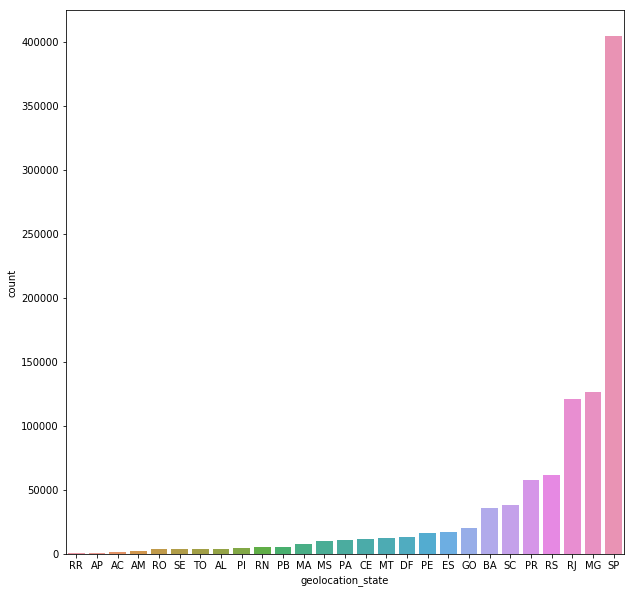

In [20]:
plt.figure(figsize=(10,10))
sns.countplot(x ='geolocation_state', data=geolocationDf, 
              order=geolocationDf['geolocation_state'].value_counts().sort_values().index);

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


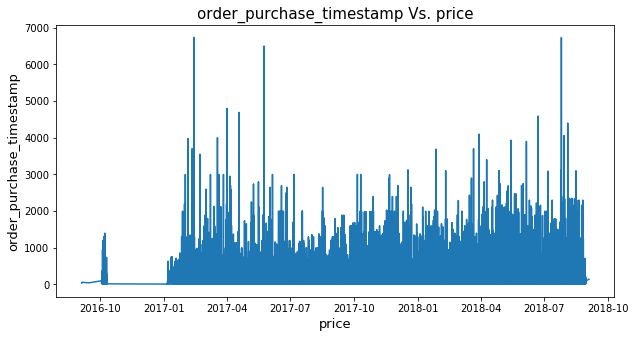

In [21]:
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full['order_purchase_timestamp']) 
plt.figure(figsize=(10,5))
sns.lineplot(x='order_purchase_timestamp', y='price', data = orders_full)
plt.xlabel('price', size='13')
plt.ylabel('order_purchase_timestamp', size='13')
plt.title('order_purchase_timestamp Vs. price', size='15');

## EDA/Products

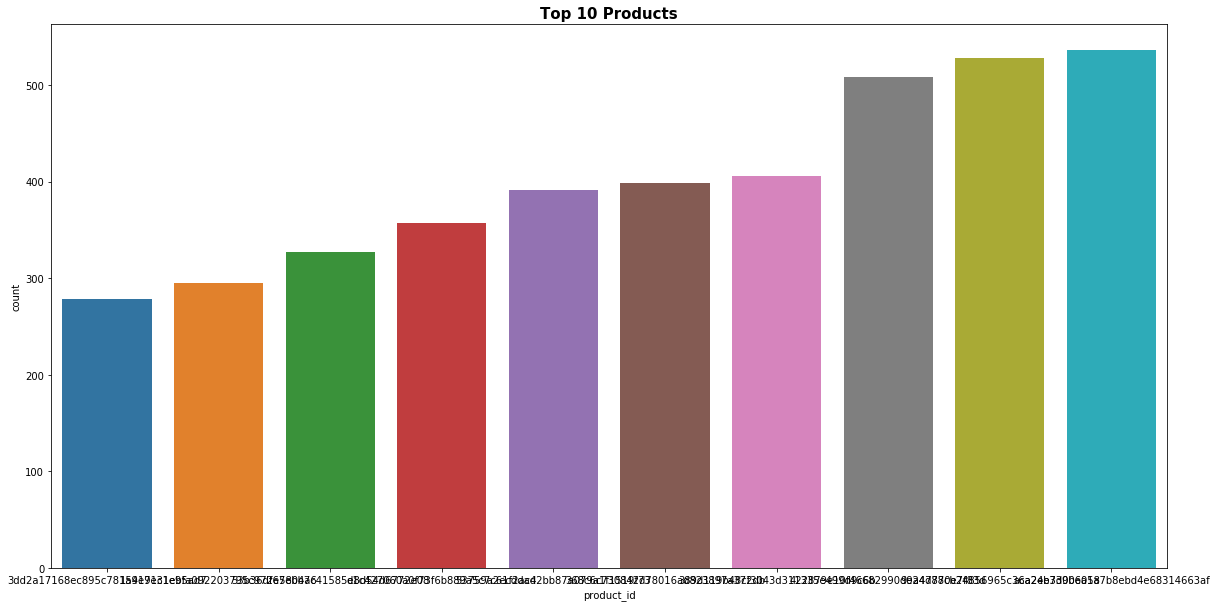

In [33]:
#Plotting Top 10 Products
plt.figure(figsize=(20,10))
sns.countplot(x='product_id', data=orders_full,
             order=orders_full['product_id'].value_counts()[:10]\
             .sort_values().index).set_title("Top 10 Products", fontsize=15,
                                             weight='bold');


In [47]:
orders_full.groupby(["product_category_name_english"])["price"].sum().sort_values(ascending=False).head(10)

product_category_name_english
health_beauty            1302046.97
watches_gifts            1254322.95
bed_bath_table           1107397.98
sports_leisure           1029631.88
computers_accessories     950134.59
furniture_decor           772496.16
housewares                668880.94
cool_stuff                664637.13
auto                      618395.50
garden_tools              519473.33
Name: price, dtype: float64

In [48]:
orders_full.groupby(["product_category_name_english"])["product_id"].count().sort_values(ascending=False).head(10)

product_category_name_english
bed_bath_table           11990
health_beauty            10033
sports_leisure            9005
furniture_decor           8833
computers_accessories     8151
housewares                7380
watches_gifts             6213
telephony                 4726
garden_tools              4590
auto                      4400
Name: product_id, dtype: int64

In [49]:
group_category= orders_full.groupby(['product_id','product_category_name_english',])['product_id']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id                        product_category_name_english
aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor                  536
99a4788cb24856965c36a24e339b6058  bed_bath_table                   528
422879e10f46682990de24d770e7f83d  garden_tools                     508
389d119b48cf3043d311335e499d9c6b  garden_tools                     406
368c6c730842d78016ad823897a372db  garden_tools                     398
53759a2ecddad2bb87a079a1f1519f73  garden_tools                     391
d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories            357
53b36df67ebb7c41585e8d54d6772e08  watches_gifts                    327
154e7e31ebfa092203795c972e5804a6  health_beauty                    295
3dd2a17168ec895c781a9191c1e95ad7  computers_accessories            278
Name: product_id, dtype: int64

In [50]:
group_category= orders_full.groupby(['product_id','product_category_name_english',])['product_id']\
                                        .count().sort_values(ascending=False).head(10)
group_category

product_id                        product_category_name_english
aca2eb7d00ea1a7b8ebd4e68314663af  furniture_decor                  536
99a4788cb24856965c36a24e339b6058  bed_bath_table                   528
422879e10f46682990de24d770e7f83d  garden_tools                     508
389d119b48cf3043d311335e499d9c6b  garden_tools                     406
368c6c730842d78016ad823897a372db  garden_tools                     398
53759a2ecddad2bb87a079a1f1519f73  garden_tools                     391
d1c427060a0f73f6b889a5c7c61f2ac4  computers_accessories            357
53b36df67ebb7c41585e8d54d6772e08  watches_gifts                    327
154e7e31ebfa092203795c972e5804a6  health_beauty                    295
3dd2a17168ec895c781a9191c1e95ad7  computers_accessories            278
Name: product_id, dtype: int64

Text(0.5, 1.0, 'Top 10 Seller')

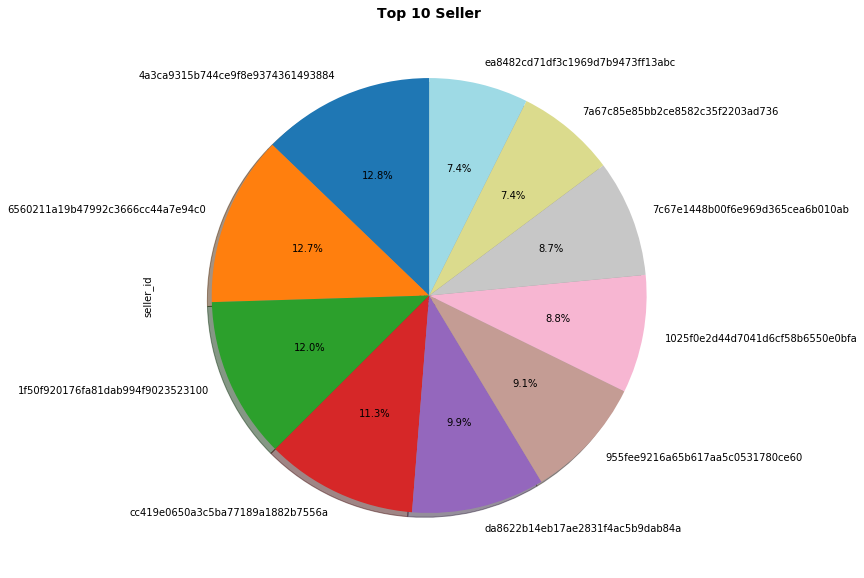

In [36]:
plt.figure(figsize=(20,10))
orders_full['seller_id'].value_counts()[:10].plot.pie(autopct='%1.1f%%',
        shadow=True, startangle=90, cmap='tab20')
plt.title("Top 10 Seller",size=14, weight='bold')

In [370]:
seller_category= orders_full.groupby(['seller_id', 'product_category_name_english'])\
                        ['seller_id'].count().sort_values(ascending=False).head(20)
seller_category

seller_id                         product_category_name_english
1f50f920176fa81dab994f9023523100  garden_tools                     1963
4a3ca9315b744ce9f8e9374361493884  bed_bath_table                   1705
6560211a19b47992c3666cc44a7e94c0  watches_gifts                    1700
da8622b14eb17ae2831f4ac5b9dab84a  bed_bath_table                   1385
1025f0e2d44d7041d6cf58b6550e0bfa  furniture_decor                  1338
7c67e1448b00f6e969d365cea6b010ab  office_furniture                 1323
ea8482cd71df3c1969d7b9473ff13abc  telephony                        1215
cc419e0650a3c5ba77189a1882b7556a  health_beauty                    1143
7a67c85e85bb2ce8582c35f2203ad736  cool_stuff                       1126
4869f7a5dfa277a7dca6462dcf3b52b2  watches_gifts                    1026
8b321bb669392f5163d04c59e235e066  electronics                       923
3d871de0142ce09b7081e2b9d1733cb1  stationery                        881
cc419e0650a3c5ba77189a1882b7556a  perfumery                         720


In [371]:
seller_category_simple= orders_full.groupby(['seller_id'])\
                        ['seller_id'].count().sort_values(ascending=False).head(20)
seller_category_simple

seller_id
4a3ca9315b744ce9f8e9374361493884    2155
6560211a19b47992c3666cc44a7e94c0    2130
1f50f920176fa81dab994f9023523100    2017
cc419e0650a3c5ba77189a1882b7556a    1893
da8622b14eb17ae2831f4ac5b9dab84a    1662
955fee9216a65b617aa5c0531780ce60    1530
1025f0e2d44d7041d6cf58b6550e0bfa    1477
7c67e1448b00f6e969d365cea6b010ab    1463
7a67c85e85bb2ce8582c35f2203ad736    1245
ea8482cd71df3c1969d7b9473ff13abc    1240
3d871de0142ce09b7081e2b9d1733cb1    1205
4869f7a5dfa277a7dca6462dcf3b52b2    1186
8b321bb669392f5163d04c59e235e066    1031
cca3071e3e9bb7d12640c9fbe2301306     902
620c87c171fb2a6dd6e8bb4dec959fc6     831
a1043bafd471dff536d0c462352beb48     808
e9779976487b77c6d4ac45f75ec7afe9     764
f8db351d8c4c4c22c6835c19a46f01b0     763
d2374cbcbb3ca4ab1086534108cc3ab7     700
391fc6631aebcf3004804e51b40bcf1e     644
Name: seller_id, dtype: int64

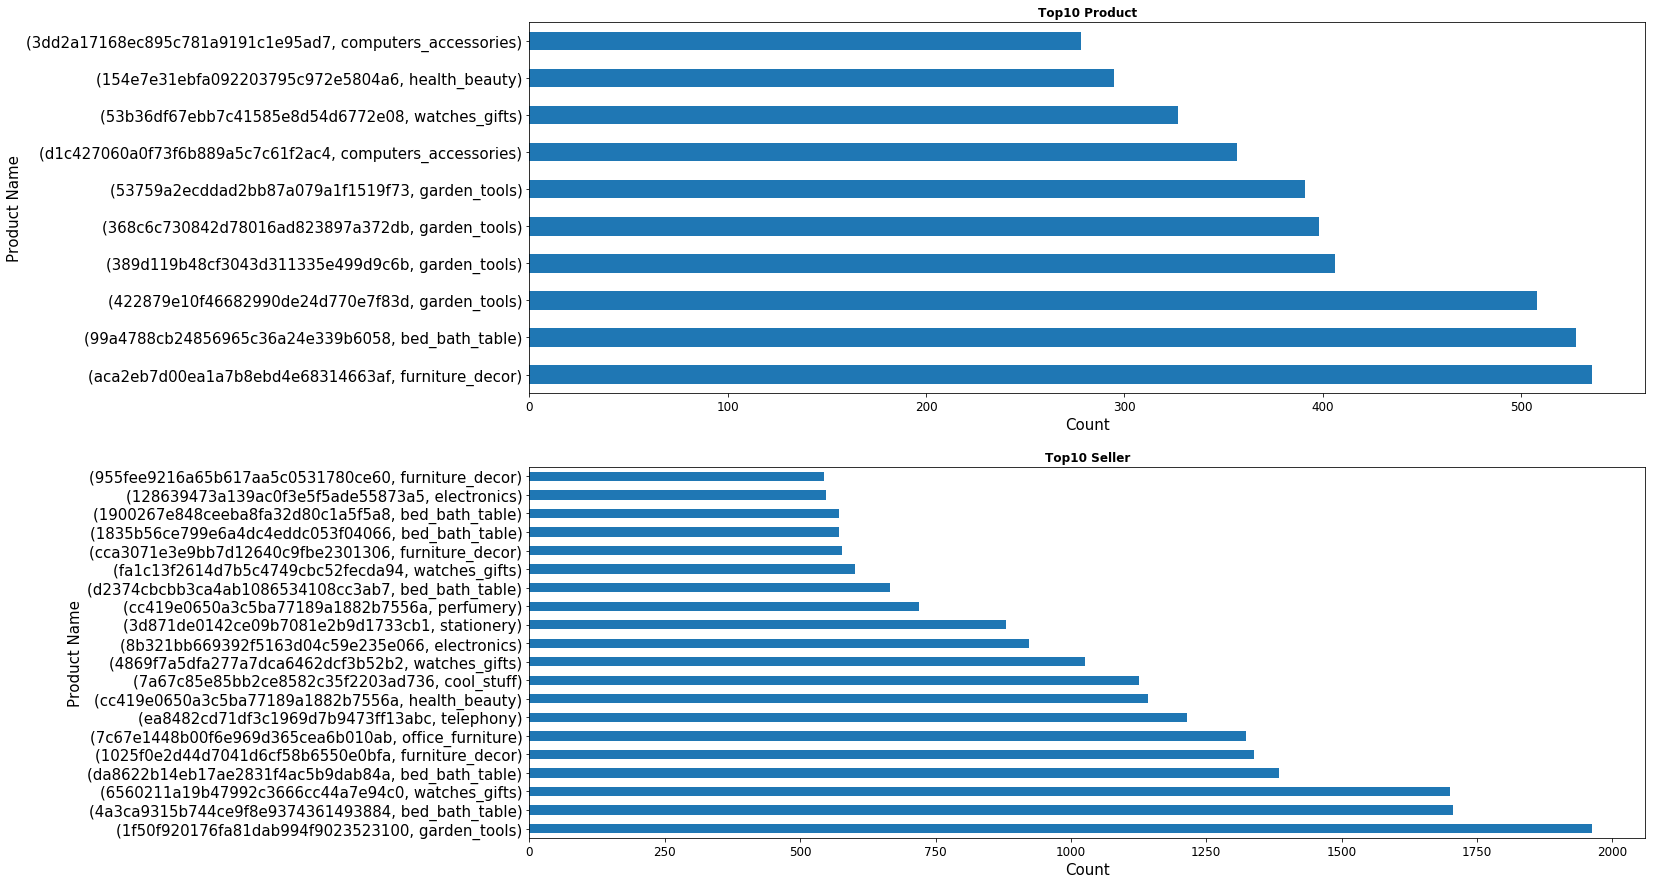

In [39]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,15))
group_category.plot.barh(ax=ax1)
seller_category.plot.barh(ax=ax2)

ax1.set_title('Top10 Product', fontweight='bold')
ax2.set_title('Top10 Seller', fontweight='bold')

ax1.set_xlabel('Count', fontsize=15)
ax1.set_ylabel('Product Name', fontsize=15)
ax1.xaxis.set_tick_params(labelsize=12)
ax1.yaxis.set_tick_params(labelsize=15)

ax2.set_xlabel('Count', fontsize=15)
ax2.set_ylabel('Product Name', fontsize=15)
ax2.xaxis.set_tick_params(labelsize=12)
ax2.yaxis.set_tick_params(labelsize=15)

In [51]:
pd.set_option('display.max_columns', None)
orders_full.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",2017-09-21 00:00:00,2017-09-22 10:57:03,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,27277.0,volta redonda,SP,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,cool_stuff,cool_stuff
1,0188777fe321843a18be24a6e9aa1e53,1.0,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-07-31 14:35:11,55.9,9.94,1.0,voucher,1.0,65.84,1fac9acb29e014e3b9b393d5c8505f99,5,NaN,ÓTIMO,2017-07-29 00:00:00,2017-08-01 20:55:50,dc573d2a61a467e5e2826c1729691859,delivered,2017-07-23 16:13:37,2017-07-25 14:35:11,2017-07-27 18:45:50,2017-07-28 16:18:00,2017-08-08 00:00:00,27277.0,volta redonda,SP,f81c042ed0162a51b90372c233b4fbad,25240,duque de caxias,RJ,cool_stuff,cool_stuff
2,0191bbb5166d4b9a68df11797d5acfa9,1.0,ec02a5d380128f7a188e9ce8f3ddd832,48436dade18ac8b2bce089ec2a041202,2017-08-16 12:30:15,132.9,20.17,1.0,credit_card,4.0,153.07,2eab04a8f45efa131d44cf58b37ab595,5,NaN,Recebi o patines em perfeitas condições bem an...,2017-08-25 00:00:00,2017-08-28 12:57:25,62b59a64eb786a96516229b7f3612c72,delivered,2017-08-10 12:17:35,2017-08-10 12:30:15,2017-08-15 19:26:45,2017-08-24 18:15:16,2017-09-08 00:00:00,27277.0,volta redonda,SP,921fa6982e780da7d9e0bb6ca11b380c,93010,sao leopoldo,RS,cool_stuff,cool_stuff
3,03054d8a8eefc2981cfad06f58e27979,1.0,3e31fd1419cc4cd6adad1925e72e3a03,48436dade18ac8b2bce089ec2a041202,2017-10-09 10:35:11,58.9,15.16,1.0,credit_card,7.0,74.06,9d0e152a1983460f059ddffcb8af03bb,5,NaN,NaN,2017-10-20 00:00:00,2017-10-20 23:45:27,9bd2f246e81c19f65c539ce426288ef5,delivered,2017-10-02 10:25:22,2017-10-03 10:35:11,2017-10-09 17:57:50,2017-10-19 21:03:49,2017-10-25 00:00:00,27277.0,volta redonda,SP,d46eb9ba6d6b75c1dac85b91911fc9c2,3560,sao paulo,SP,cool_stuff,cool_stuff
4,0c325ea6925de749e1420be0cf43587c,1.0,3a135477bf41350a0b1d8afdf616d446,48436dade18ac8b2bce089ec2a041202,2017-07-06 15:43:50,139.9,16.74,1.0,credit_card,1.0,156.64,f4fad24d4bb3462bab004be9a0b753f0,4,NaN,"Atendimento excelente,o produto chegou antes d...",2017-07-11 00:00:00,2017-07-13 23:18:14,e03505278b34146e87c0b4eb41e4f082,delivered,2017-07-01 15:27:23,2017-07-01 15:43:50,2017-07-05 12:00:33,2017-07-10 17:17:21,2017-07-25 00:00:00,27277.0,volta redonda,SP,c082f4437360e3466068035e94a3345b,18540,porto feliz,SP,brinquedos,toys


In [52]:
#create dummies

In [36]:
orders_full_new = orders_full[['order_id', 'order_item_id', 'product_category_name_english', "payment_installments", 'order_purchase_timestamp', 'review_score', 'price','freight_value', "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", 'customer_city', "seller_city", "product_photos_qty", "late_delivery"]]
orders_full_new.head()

,order_id,order_item_id,product_category_name_english,payment_installments,order_purchase_timestamp,review_score,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,customer_city,seller_city,product_photos_qty,late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,cool_stuff,2.0,2017-09-13 08:59:02,5,58.9,13.29,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35,campos dos goytacazes,volta redonda,4.0,0
1,0188777fe321843a18be24a6e9aa1e53,1.0,cool_stuff,1.0,2017-07-23 16:13:37,5,55.9,9.94,2017-07-28 16:18:00,2017-08-08,2017-07-31 14:35:11,duque de caxias,volta redonda,6.0,0
2,0191bbb5166d4b9a68df11797d5acfa9,1.0,cool_stuff,4.0,2017-08-10 12:17:35,5,132.9,20.17,2017-08-24 18:15:16,2017-09-08,2017-08-16 12:30:15,sao leopoldo,volta redonda,2.0,0
3,03054d8a8eefc2981cfad06f58e27979,1.0,cool_stuff,7.0,2017-10-02 10:25:22,5,58.9,15.16,2017-10-19 21:03:49,2017-10-25,2017-10-09 10:35:11,sao paulo,volta redonda,1.0,0
4,0c325ea6925de749e1420be0cf43587c,1.0,toys,1.0,2017-07-01 15:27:23,4,139.9,16.74,2017-07-10 17:17:21,2017-07-25,2017-07-06 15:43:50,porto feliz,volta redonda,3.0,0


## TimeSeries. Facebook Prophet

In [80]:
df_facebook_full = orders_full[['order_purchase_timestamp', 'price']]
df_facebook_full = df_facebook_full.fillna(0)
df_facebook_full['order_purchase_timestamp'] = pd.to_datetime(df_facebook_full.order_purchase_timestamp)
df_facebook_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 2 columns):
order_purchase_timestamp    119151 non-null datetime64[ns]
price                       119151 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.7 MB


In [81]:
df_facebook_full11 = pd.DataFrame(df_facebook_full.groupby([df_facebook_full['order_purchase_timestamp'].dt.date])['price'].sum())
df_facebook_full11

,price
order_purchase_timestamp,
2016-09-04,72.89
2016-09-05,59.50
2016-09-13,0.00
2016-09-15,134.97
2016-10-02,100.00
2016-10-03,463.48
2016-10-04,10488.26
2016-10-05,8602.85
2016-10-06,7960.51


In [82]:
#df_facebook_full.to_pickle('df_facebook_full.pkl')

In [83]:
df_facebook = pd.DataFrame(df_facebook_full.groupby([df_facebook_full['order_purchase_timestamp'].dt.date])['price'].sum()).reset_index()
df_facebook

,order_purchase_timestamp,price
0,2016-09-04,72.89
1,2016-09-05,59.50
2,2016-09-13,0.00
3,2016-09-15,134.97
4,2016-10-02,100.00
5,2016-10-03,463.48
6,2016-10-04,10488.26
7,2016-10-05,8602.85
8,2016-10-06,7960.51
9,2016-10-07,7608.03


In [84]:
startdate = pd.to_datetime("2017-01-01").date()
enddate = pd.to_datetime("2018-07-31").date()
df_facebook = df_facebook[(df_facebook['order_purchase_timestamp'] > startdate)]
df_facebook = df_facebook[(df_facebook['order_purchase_timestamp'] < enddate)]
df_facebook

,order_purchase_timestamp,price
15,2017-01-05,396.90
16,2017-01-06,3460.38
17,2017-01-07,1351.90
18,2017-01-08,709.58
19,2017-01-09,673.79
20,2017-01-10,1434.87
21,2017-01-11,2776.16
22,2017-01-12,2234.58
23,2017-01-13,2505.58
24,2017-01-14,1112.69


In [100]:
df_facebook = df_facebook.rename(columns={"order_purchase_timestamp": "ds", "price": "y"})
df_facebook2 = df_facebook

In [86]:
df_facebook['y'].describe()

count       572.000000
mean      23237.836503
std       12656.852420
min         396.900000
25%       14521.377500
50%       21812.945000
75%       30261.215000
max      157684.050000
Name: y, dtype: float64

In [87]:
df7 = df_facebook
df7['ds'] = pd.to_datetime(df7.ds)
df7.index = df7['ds']
df7 = df7.drop(['ds'],axis=1)
df7 = df7.resample('W').sum().reset_index()
df7['ds'] = pd.to_datetime(df7.ds)
df7.head()

,ds,y
0,2017-01-08,5918.76
1,2017-01-15,13087.14
2,2017-01-22,25826.15
3,2017-01-29,62327.18
4,2017-02-05,74253.83


In [53]:
from fbprophet import Prophet
model = Prophet(yearly_seasonality=True)

In [54]:
model.fit(df7);

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [55]:
future = model.make_future_dataframe(periods=21, freq='W')
future.shape

(104, 1)

In [56]:
future.tail(10)

,ds
94,2018-10-28
95,2018-11-04
96,2018-11-11
97,2018-11-18
98,2018-11-25
99,2018-12-02
100,2018-12-09
101,2018-12-16
102,2018-12-23
103,2018-12-30


In [57]:
df7.shape

(83, 2)

In [58]:
future.shape[0] - df7.shape[0]

21

In [59]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
94,2018-10-28,235254.922491,192719.857192,274495.399951
95,2018-11-04,225277.375246,185495.154014,264609.937613
96,2018-11-11,260065.747935,217775.139149,301424.963395
97,2018-11-18,332669.436875,287447.494824,371369.287333
98,2018-11-25,399703.436191,357979.618488,438743.450936
99,2018-12-02,414394.115282,373089.751578,455822.276891
100,2018-12-09,364991.254419,322629.265442,405061.937033
101,2018-12-16,284752.748864,242021.270287,325836.537180
102,2018-12-23,225139.842484,183126.917743,266251.131965
103,2018-12-30,216368.229602,172627.788106,256845.761790


In [60]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-08,37334.041361,-22949.038616,58901.650921,37334.041361,37334.041361,-20420.022622,-20420.022622,-20420.022622,-20420.022622,-20420.022622,-20420.022622,0.0,0.0,0.0,16914.018739
1,2017-01-15,41106.381415,15470.978103,97489.393700,41106.381415,41106.381415,12812.971515,12812.971515,12812.971515,12812.971515,12812.971515,12812.971515,0.0,0.0,0.0,53919.352930
2,2017-01-22,44878.721469,26002.464979,110688.924942,44878.721469,44878.721469,22566.681806,22566.681806,22566.681806,22566.681806,22566.681806,22566.681806,0.0,0.0,0.0,67445.403275
3,2017-01-29,48651.061523,24793.379497,101875.533266,48651.061523,48651.061523,15054.022545,15054.022545,15054.022545,15054.022545,15054.022545,15054.022545,0.0,0.0,0.0,63705.084068
4,2017-02-05,52423.401576,18915.264105,96662.873300,52423.401576,52423.401576,7495.565481,7495.565481,7495.565481,7495.565481,7495.565481,7495.565481,0.0,0.0,0.0,59918.967057


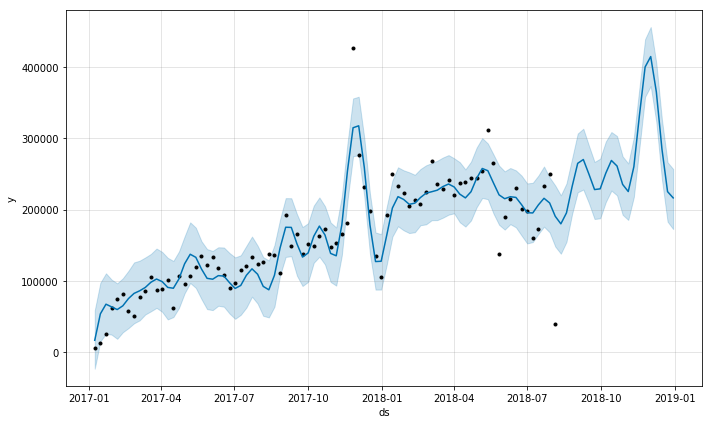

In [61]:
fig1 = model.plot(forecast)

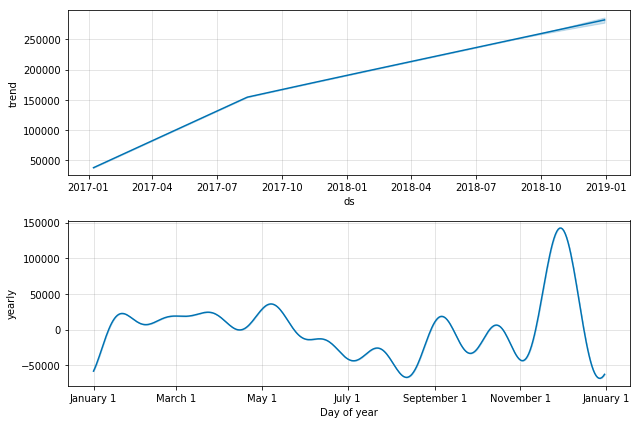

In [62]:
fig2 = model.plot_components(forecast)

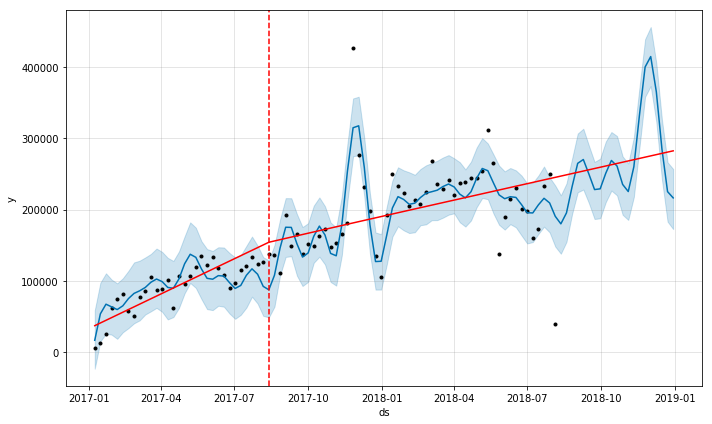

In [63]:
#Prophet does "change point" detection where it looks at the trend of the data and tries to pick-out places where that trend has an elbow in it that's serious enough to be considered a "new trend."
from fbprophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

## Holidays/Special days

In [64]:
christmas_new_year = pd.DataFrame({
  'holiday': 'christmas_new_year',
  'ds': pd.to_datetime(['2017-11-26']),
  'lower_window': 0,
  'upper_window': 1,
})
black_friday = pd.DataFrame({
  'holiday': 'black_friday',
  'ds': pd.to_datetime(['2017-11-23', '2017-11-24','2017-11-25']),
  'lower_window': 0,
  'upper_window': 1,
})
holidays = pd.concat((christmas_new_year, black_friday))
holidays

,holiday,ds,lower_window,upper_window
0,christmas_new_year,2017-11-26,0,1
0,black_friday,2017-11-23,0,1
1,black_friday,2017-11-24,0,1
2,black_friday,2017-11-25,0,1


In [65]:
m = Prophet(holidays=holidays, yearly_seasonality=True)
forecast = m.fit(df7).predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



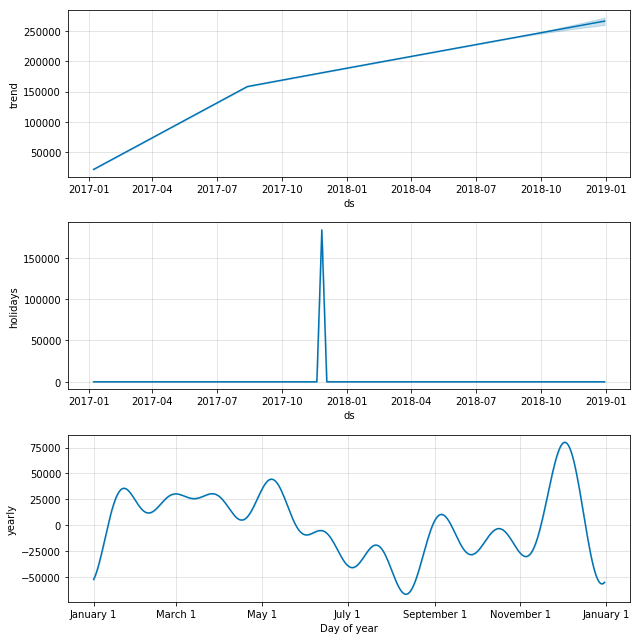

In [66]:
fig = m.plot_components(forecast)


## Seasonality Level Adjustments

In [71]:
m = Prophet(holidays=holidays, yearly_seasonality=True, weekly_seasonality=False) 
# This allows more "wiggly" yearly seasonality, and no weekly seasonality
forecast = m.fit(df7).predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



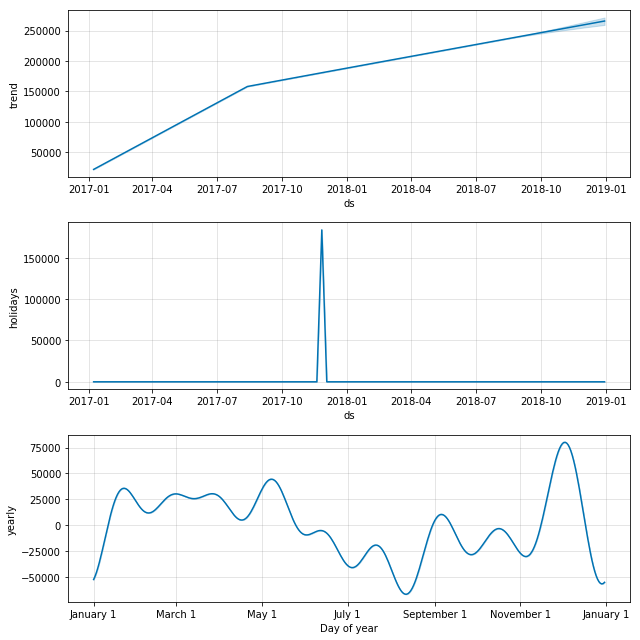

In [72]:
fig = m.plot_components(forecast)

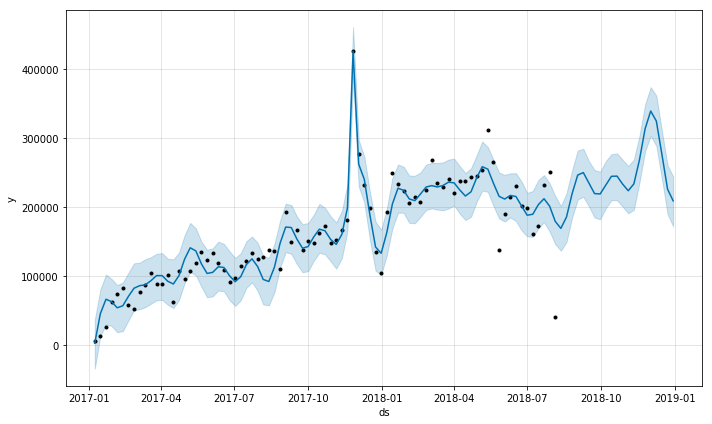

In [73]:
fig1 = model.plot(forecast)

## ARIMA

In [101]:
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import os
import pandas as pd
import pickle
import requests
from collections import Counter

from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from numpy import log
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.vector_ar.var_model import VAR

In [102]:
# check montly deviations for various diffs
print(df_facebook2.y.std())
print(df_facebook2.y.diff().std())
print(df_facebook2.y.diff().diff().std()) # theoretically lowest, but one above is close enough
print(df_facebook2.y.diff().diff().diff().std())

12656.852420181895
9404.360915551199
15111.467263381293
26670.319108483644


In [106]:
#df_facebook2["y"] = df_facebook2["y"].apply(pd.to_numeric, errors='coerce')

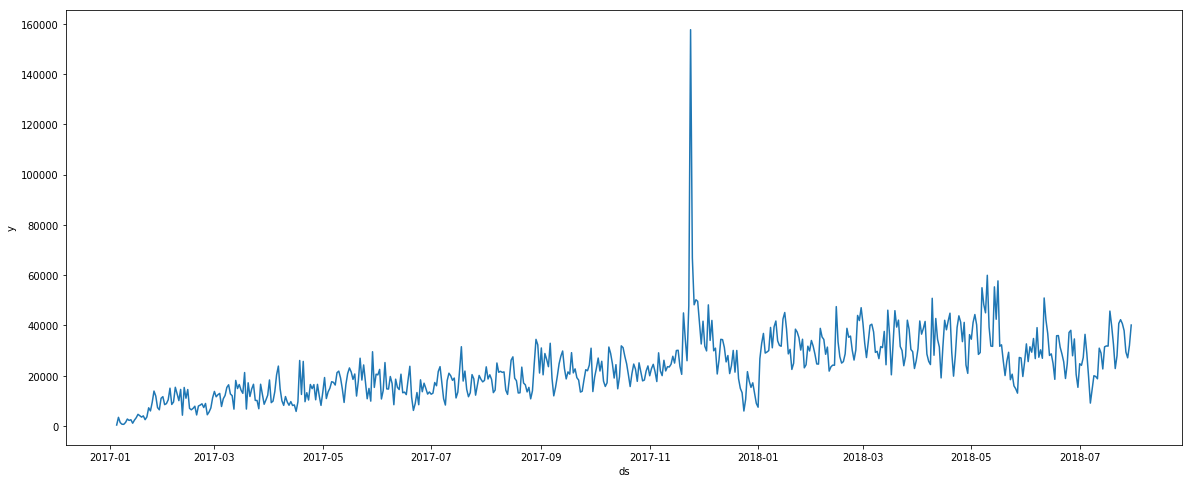

In [132]:
plt.figure(figsize=(20,8))
sns.lineplot(x = df_facebook2['ds'], y=df_facebook2['y']);


In [133]:
##Check for stationarity
# define Dickey-Fuller Test (DFT) function
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determine rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)

Test Statistic           -2.894337
p-value                   0.046010
Lags Used                14.000000
Observations Used       557.000000
Critical Value (1%)      -3.442145
Critical Value (5%)      -2.866743
Critical Value (10%)     -2.569541
dtype: float64


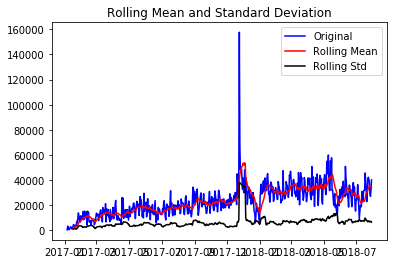

In [108]:
# run DFT on monthly
dftest(df_facebook2.y)
# p-value allows us to reject a unit root: data is stationary

In [134]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(data):
    
    p_val=adfuller(data)[1]
    if p_val >= 0.05:
        print("Time series data is not stationary. Adfuller test pvalue={}".format(p_val))
    else:
        print("Time series data is stationary. Adfuller test pvalue={}".format(p_val))

In [135]:
test_stationarity(df_facebook2['y'])

Time series data is stationary. Adfuller test pvalue=0.046010483549217995


In [136]:
from statsmodels.tsa.arima_model import ARIMA 

# Note that statsmodels is an imperfect library and the functionality for ARIMA is frustrating to use
# You can get a model summary using only ARIMA, so even if you're building an AR, MA or ARMA model, use 
# the ARIMA method, just set the other orders = 0 

AR = ARIMA(df_facebook2.y,(1,0,0)).fit() # order = (p,d,q) = (AR, difference, MA)
AR.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  572
Model:                     ARMA(1, 0)   Log Likelihood               -6002.866
Method:                       css-mle   S.D. of innovations           8733.569
Date:                Thu, 12 Dec 2019   AIC                          12011.731
Time:                        00:33:59   BIC                          12024.779
Sample:                    01-05-2017   HQIC                         12016.821
                         - 07-30-2018                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.324e+04   1322.482     17.571      0.000    2.06e+04    2.58e+04
ar.L1.y        0.7251      0.029     25.071      0.000       0.668       0.782
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3790           +0.0000j            1.3790            0.0000
-----------------------------------------------------------------------------
"""

In [141]:
## Create Helper Functions
# define helper plot function for visualization
import statsmodels.tsa.api as smt

def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    data.plot(ax=raw, figsize=(12, 6))
    smt.graphics.plot_acf(data, lags=lags, ax=acf)
    smt.graphics.plot_pacf(data, lags=lags, ax=pacf)
    sns.despine()
    plt.tight_layout()
    
    

In [142]:
# we might need to install dev version for statespace functionality
#!pip install git+https://github.com/statsmodels/statsmodels.git
import statsmodels.api as sm

import statsmodels.api as sm

# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(df_facebook2.y, order=(1,1,0), seasonal_order=(0,1,0,12), trend='c').fit()
sar.summary()

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:163: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  572
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -6098.015
Date:                            Thu, 12 Dec 2019   AIC                          12202.030
Time:                                    00:35:41   BIC                          12215.009
Sample:                                01-05-2017   HQIC                         12207.098
                                     - 07-30-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -12.8199    560.540     -0.023      0.982   -1111.459    1085.819
ar.L1         -0.2352      0.015    -15.744      0.000      -0.265      -0.206
sigma2      1.752e+08      0.000   1.32e+12      0.000    1.75e+08    1.75e+08
===================================================================================
Ljung-Box (Q):                      663.38   Jarque-Bera (JB):              8710.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.30   Skew:                            -0.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.75e+28. Standard errors may be unstable.
"""

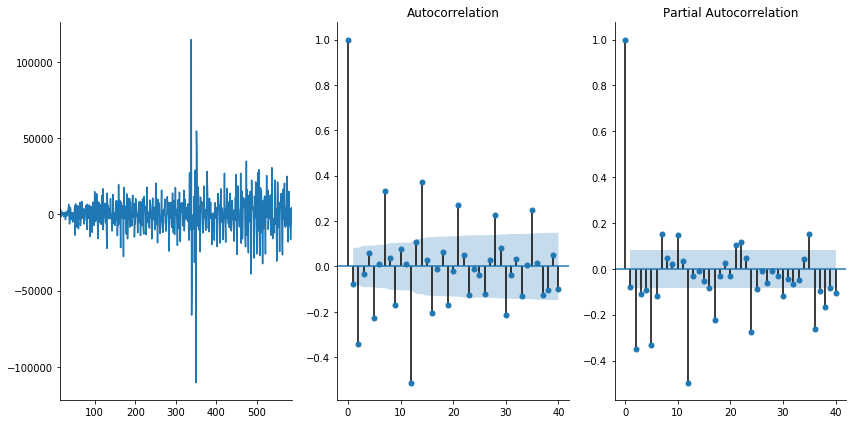

In [607]:
# plot resids
plots(sar.resid, lags=40);

# Thought process: (Reference: https://people.duke.edu/~rnau/arimrule.htm)
# 010010 is overdiff by AIC and negative ACR, but 000010 is a big underdiff with better AIC
# we pick 000010,12 and Trend='c' per rule4/5

# now look at seasonal, notice negative ACR spike at 12: per rule 13, we add a SMA term
# big drop to 4284 AIC
# looks like ACR looks good at seasonal lags, so we move back to ARIMA portion

# rule6 says we're a bit underdiff, so we add AR=3 based on PACF: 4261 AIC

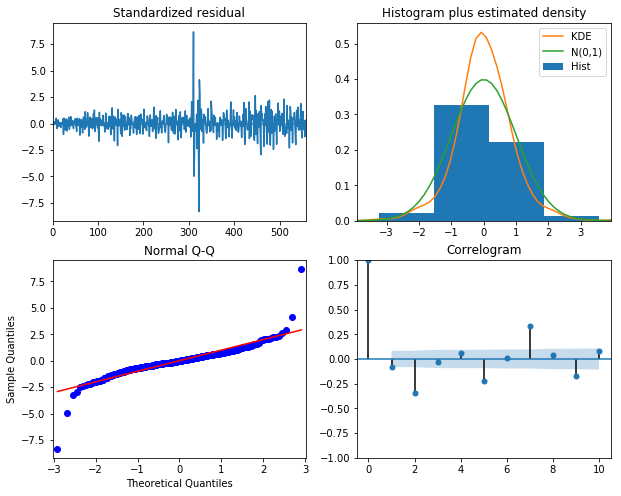

In [622]:
# plot residual diagnostics
sar.plot_diagnostics(figsize=(10, 8));

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:531: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



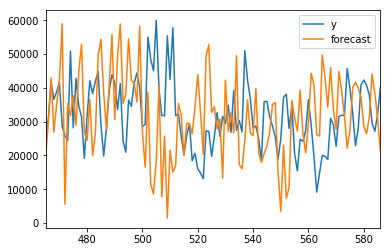

In [756]:
# plot predictions
df_facebook['forecast'] = sar.predict(start = 450, end= 771, dynamic=121)  
df_facebook[450:][['y', 'forecast']].plot();

# per the documentation, we start predicting at period 750, and start a dynamic forecast at 750 + 30
# this means we use our predictions as "ground truth" for following predictions

## Price Prenicting

In [145]:
# Object to Datetime
orders_full['order_delivered_customer_date'] = pd.to_datetime(orders_full.order_delivered_customer_date)
orders_full['order_estimated_delivery_date'] = pd.to_datetime(orders_full.order_estimated_delivery_date)
orders_full['order_purchase_timestamp'] = pd.to_datetime(orders_full.order_purchase_timestamp)

In [146]:
orders_full['estimated_time'] = orders_full['order_estimated_delivery_date'] - orders_full['order_purchase_timestamp']

In [147]:
#Real Delivery Time
orders_full['informed_actual_time'] = orders_full['order_delivered_customer_date'] - orders_full['order_estimated_delivery_date']
#Late Delivery?
orders_full['informed_actual_time'] = orders_full['informed_actual_time'].apply(lambda x: x / np.timedelta64(1, 'h'))
orders_full['informed_actual_time'] = orders_full['informed_actual_time'].apply(lambda x: x / 24)
orders_full['late_delivery'] = orders_full['informed_actual_time'].apply(lambda x: 1 if x >= 0 else 0)

In [148]:
# Difference between Freight value and price
orders_full['freight_price_ratio'] = orders_full['freight_value']/orders_full['price']

In [149]:
orders_full.product_category_name.unique()

array(['cool_stuff', 'brinquedos', 'tablets_impressao_imagem', 'pet_shop',
       nan, 'moveis_decoracao', 'cama_mesa_banho', 'perfumaria',
       'informatica_acessorios', 'utilidades_domesticas', 'papelaria',
       'ferramentas_jardim', 'esporte_lazer', 'telefonia', 'audio',
       'beleza_saude', 'bebes', 'construcao_ferramentas_jardim',
       'relogios_presentes', 'livros_tecnicos', 'dvds_blu_ray',
       'consoles_games', 'alimentos', 'fashion_bolsas_e_acessorios',
       'casa_conforto', 'casa_conforto_2', 'instrumentos_musicais',
       'moveis_sala', 'automotivo', 'moveis_escritorio',
       'sinalizacao_e_seguranca', 'construcao_ferramentas_iluminacao',
       'eletronicos', 'casa_construcao', 'cine_foto',
       'construcao_ferramentas_construcao', 'telefonia_fixa',
       'fraldas_higiene', 'pc_gamer', 'fashion_roupa_masculina',
       'eletroportateis', 'industria_comercio_e_negocios',
       'construcao_ferramentas_seguranca', 'fashion_esporte',
       'malas_acessorios'

In [152]:
orders_full_new = orders_full[['order_id', 'order_item_id', 'product_category_name_english', "payment_installments", 'order_purchase_timestamp', 'review_score', 'price','freight_value', "order_delivered_customer_date", "order_estimated_delivery_date", "shipping_limit_date", 'customer_city', "seller_city", "product_photos_qty", "late_delivery"]]
orders_full_new.head()

,order_id,order_item_id,product_category_name_english,payment_installments,order_purchase_timestamp,review_score,price,freight_value,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,customer_city,seller_city,product_photos_qty,late_delivery
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,cool_stuff,2.0,2017-09-13 08:59:02,5,58.9,13.29,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35,campos dos goytacazes,volta redonda,4.0,0
1,0188777fe321843a18be24a6e9aa1e53,1.0,cool_stuff,1.0,2017-07-23 16:13:37,5,55.9,9.94,2017-07-28 16:18:00,2017-08-08,2017-07-31 14:35:11,duque de caxias,volta redonda,6.0,0
2,0191bbb5166d4b9a68df11797d5acfa9,1.0,cool_stuff,4.0,2017-08-10 12:17:35,5,132.9,20.17,2017-08-24 18:15:16,2017-09-08,2017-08-16 12:30:15,sao leopoldo,volta redonda,2.0,0
3,03054d8a8eefc2981cfad06f58e27979,1.0,cool_stuff,7.0,2017-10-02 10:25:22,5,58.9,15.16,2017-10-19 21:03:49,2017-10-25,2017-10-09 10:35:11,sao paulo,volta redonda,1.0,0
4,0c325ea6925de749e1420be0cf43587c,1.0,toys,1.0,2017-07-01 15:27:23,4,139.9,16.74,2017-07-10 17:17:21,2017-07-25,2017-07-06 15:43:50,porto feliz,volta redonda,3.0,0


In [153]:
df66667 = pd.get_dummies(orders_full_new, columns=['customer_city', 'product_category_name_english'])
df66667.columns

Index(['order_id', 'order_item_id', 'payment_installments',
       'order_purchase_timestamp', 'review_score', 'price', 'freight_value',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'shipping_limit_date',
       ...
       'product_category_name_english_security_and_services',
       'product_category_name_english_signaling_and_security',
       'product_category_name_english_small_appliances',
       'product_category_name_english_small_appliances_home_oven_and_coffee',
       'product_category_name_english_sports_leisure',
       'product_category_name_english_stationery',
       'product_category_name_english_tablets_printing_image',
       'product_category_name_english_telephony',
       'product_category_name_english_toys',
       'product_category_name_english_watches_gifts'],
      dtype='object', length=4203)

In [166]:
orders_full_new_dum = df66667[['order_purchase_timestamp' , "payment_installments", 'review_score', 'price', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'product_category_name_english_health_beauty', 'product_category_name_english_bed_bath_table', 'product_category_name_english_sports_leisure', 'product_category_name_english_computers_accessories',  'product_category_name_english_furniture_decor', 'product_category_name_english_housewares', 'product_category_name_english_cool_stuff', 'product_category_name_english_auto', 'product_category_name_english_garden_tools', "product_photos_qty", "late_delivery"]]
orders_full_new_dum.fillna(value=0).head()

,order_purchase_timestamp,payment_installments,review_score,price,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,product_category_name_english_bed_bath_table,product_category_name_english_sports_leisure,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_housewares,product_category_name_english_cool_stuff,product_category_name_english_auto,product_category_name_english_garden_tools,product_photos_qty,late_delivery
0,2017-09-13 08:59:02,2.0,5,58.9,13.29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0
1,2017-07-23 16:13:37,1.0,5,55.9,9.94,0,0,0,0,0,...,0,0,0,0,0,1,0,0,6.0,0
2,2017-08-10 12:17:35,4.0,5,132.9,20.17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,0
3,2017-10-02 10:25:22,7.0,5,58.9,15.16,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,0
4,2017-07-01 15:27:23,1.0,4,139.9,16.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,0


In [167]:
orders_full_new_dum.head()

,order_purchase_timestamp,payment_installments,review_score,price,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,product_category_name_english_bed_bath_table,product_category_name_english_sports_leisure,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_housewares,product_category_name_english_cool_stuff,product_category_name_english_auto,product_category_name_english_garden_tools,product_photos_qty,late_delivery
0,2017-09-13 08:59:02,2.0,5,58.9,13.29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0
1,2017-07-23 16:13:37,1.0,5,55.9,9.94,0,0,0,0,0,...,0,0,0,0,0,1,0,0,6.0,0
2,2017-08-10 12:17:35,4.0,5,132.9,20.17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,0
3,2017-10-02 10:25:22,7.0,5,58.9,15.16,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,0
4,2017-07-01 15:27:23,1.0,4,139.9,16.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,0


In [168]:
orders_full_new_dum.shape

(119151, 22)

In [169]:
#orders_full_new_dum.to_csv("orders_full_new_dum.csv")

In [170]:
orders_full_new_dum1 = orders_full_new_dum.rename(columns={"order_purchase_timestamp": "ds", "price": "y"})
#orders_full_new_dum['order_purchase_timestamp'] = pd.to_datetime(orders_full_new_dum['order_purchase_timestamp']).dt.date

In [171]:
orders_full_new_dum1['ds'] = pd.to_datetime(orders_full_new_dum1['ds'], errors='coerce')

orders_full_new_dum1

,ds,payment_installments,review_score,y,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,product_category_name_english_bed_bath_table,product_category_name_english_sports_leisure,product_category_name_english_computers_accessories,product_category_name_english_furniture_decor,product_category_name_english_housewares,product_category_name_english_cool_stuff,product_category_name_english_auto,product_category_name_english_garden_tools,product_photos_qty,late_delivery
0,2017-09-13 08:59:02,2.0,5,58.9,13.29,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0
1,2017-07-23 16:13:37,1.0,5,55.9,9.94,0,0,0,0,0,...,0,0,0,0,0,1,0,0,6.0,0
2,2017-08-10 12:17:35,4.0,5,132.9,20.17,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,0
3,2017-10-02 10:25:22,7.0,5,58.9,15.16,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1.0,0
4,2017-07-01 15:27:23,1.0,4,139.9,16.74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.0,0
5,2017-08-14 20:28:35,1.0,5,48.9,17.92,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,0
6,2017-06-28 11:52:20,1.0,5,55.9,17.96,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0
7,2017-09-22 11:08:46,1.0,5,99.9,17.95,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1.0,0
8,2017-09-28 10:18:49,2.0,3,42.9,16.11,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0
9,2017-09-30 20:12:05,2.0,1,42.9,16.11,0,0,0,0,0,...,0,0,0,0,0,1,0,0,4.0,0


In [172]:
orders_full_new_dum1 = orders_full_new_dum1.fillna(value=0)


In [173]:
orders_full_new_dum1['ds'] = pd.to_datetime(orders_full_new_dum1['ds']).dt.date

In [174]:
orders_full_new_dum1['Num_ordrs'] = 1

In [175]:
orders_full_new_dum1.to_csv("orders_full_new_dum1.csv")

In [176]:
orders_full_new_dum1.shape

(119151, 23)

In [216]:
#orders_full_new_dum14=orders_full_new_dum1.astype(float)

In [178]:
orders_full_new_dum1 = orders_full_new_dum1.sort_values(by='ds')
orders_full_new_dum1777 = orders_full_new_dum1.groupby([orders_full_new_dum1['ds']]).agg(['sum','mean']).reset_index()
orders_full_new_dum1777 = orders_full_new_dum1777.head(616)
orders_full_new_dum1777.columns = ['_'.join(x) for x in orders_full_new_dum1777.columns]
orders_full_new_dum15 = orders_full_new_dum1777[['ds_', "y_sum", "payment_installments_sum", 'review_score_mean', 'freight_value_sum', 'customer_city_sao paulo_sum', "customer_city_rio de janeiro_sum", 'customer_city_belo horizonte_sum', 'customer_city_brasilia_sum', "customer_city_curitiba_sum", "customer_city_salvador_sum", 'product_category_name_english_health_beauty_sum', 'product_category_name_english_bed_bath_table_sum', 'product_category_name_english_sports_leisure_sum', 'product_category_name_english_computers_accessories_sum', 'product_category_name_english_furniture_decor_sum', 'product_category_name_english_housewares_sum', 'product_category_name_english_cool_stuff_sum', 'product_category_name_english_auto_sum', 'product_category_name_english_garden_tools_sum', "product_photos_qty_sum", 'Num_ordrs_sum', "late_delivery_sum" ]]
orders_full_new_dum16 = orders_full_new_dum15.set_axis(['ds', "y", "payment_installments", 'review_score', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'health_beauty', 'bed_bath_table', 'sports_leisure', 'computers_accessories', 'furniture_decor', 'housewares', 'cool_stuff', 'auto', 'garden_tools', "product_photos_qty", "Num_ordrs", "late_delivery"], axis=1, inplace=False)
orders_full_new_dum16.head(10)

,ds,y,payment_installments,review_score,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,sports_leisure,computers_accessories,furniture_decor,housewares,cool_stuff,auto,garden_tools,product_photos_qty,Num_ordrs,late_delivery
0,2016-09-04,72.89,2.0,1.000000,63.34,0,0,0,0,0,...,0,0,2,0,0,0,0,5.0,2,0
1,2016-09-05,59.50,3.0,1.000000,15.56,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,0
2,2016-09-13,0.00,2.0,1.000000,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,0
3,2016-09-15,134.97,0.0,1.000000,8.49,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,3,3
4,2016-10-02,100.00,1.0,1.000000,9.34,1,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,0
5,2016-10-03,463.48,19.0,3.000000,131.66,1,1,0,0,0,...,3,0,2,0,0,0,0,11.0,8,0
6,2016-10-04,10488.26,302.0,3.772152,1489.74,10,15,3,0,1,...,3,2,22,3,2,1,1,151.0,79,2
7,2016-10-05,8602.85,232.0,3.230769,1355.26,2,6,6,1,0,...,1,3,8,0,0,4,0,122.0,65,0
8,2016-10-06,7960.51,196.0,3.350000,1170.72,7,6,0,2,2,...,4,5,5,2,3,1,1,153.0,60,0
9,2016-10-07,7608.03,209.0,3.240741,943.62,8,12,1,0,0,...,1,4,6,3,3,2,1,141.0,54,0


In [179]:
orders_full_new_dum16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 616 entries, 0 to 615
Data columns (total 23 columns):
ds                              616 non-null object
y                               616 non-null float64
payment_installments            616 non-null float64
review_score                    616 non-null float64
freight_value                   616 non-null float64
customer_city_sao paulo         616 non-null uint8
customer_city_rio de janeiro    616 non-null uint8
customer_city_belo horizonte    616 non-null uint8
customer_city_brasilia          616 non-null uint8
customer_city_curitiba          616 non-null uint8
customer_city_salvador          616 non-null uint8
health_beauty                   616 non-null uint8
bed_bath_table                  616 non-null uint8
sports_leisure                  616 non-null uint8
computers_accessories           616 non-null uint8
furniture_decor                 616 non-null uint8
housewares                      616 non-null uint8
cool_stuff         

In [180]:
pd.to_datetime(orders_full_new_dum16.ds)

0     2016-09-04
1     2016-09-05
2     2016-09-13
3     2016-09-15
4     2016-10-02
5     2016-10-03
6     2016-10-04
7     2016-10-05
8     2016-10-06
9     2016-10-07
10    2016-10-08
11    2016-10-09
12    2016-10-10
13    2016-10-22
14    2016-12-23
15    2017-01-05
16    2017-01-06
17    2017-01-07
18    2017-01-08
19    2017-01-09
20    2017-01-10
21    2017-01-11
22    2017-01-12
23    2017-01-13
24    2017-01-14
25    2017-01-15
26    2017-01-16
27    2017-01-17
28    2017-01-18
29    2017-01-19
         ...    
586   2018-07-30
587   2018-07-31
588   2018-08-01
589   2018-08-02
590   2018-08-03
591   2018-08-04
592   2018-08-05
593   2018-08-06
594   2018-08-07
595   2018-08-08
596   2018-08-09
597   2018-08-10
598   2018-08-11
599   2018-08-12
600   2018-08-13
601   2018-08-14
602   2018-08-15
603   2018-08-16
604   2018-08-17
605   2018-08-18
606   2018-08-19
607   2018-08-20
608   2018-08-21
609   2018-08-22
610   2018-08-23
611   2018-08-24
612   2018-08-25
613   2018-08-

In [181]:
data30 = orders_full_new_dum16.copy()

In [182]:
data30['ds'] = pd.to_datetime(data30.ds)

In [183]:
data30.index = data30['ds'] 
data30

,ds,y,payment_installments,review_score,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,...,sports_leisure,computers_accessories,furniture_decor,housewares,cool_stuff,auto,garden_tools,product_photos_qty,Num_ordrs,late_delivery
ds,,,,,,,,,,,,,,,,,,,,,
2016-09-04,2016-09-04,72.89,2.0,1.000000,63.34,0,0,0,0,0,...,0,0,2,0,0,0,0,5.0,2,0
2016-09-05,2016-09-05,59.50,3.0,1.000000,15.56,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,0
2016-09-13,2016-09-13,0.00,2.0,1.000000,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0.0,1,0
2016-09-15,2016-09-15,134.97,0.0,1.000000,8.49,0,0,0,0,0,...,0,0,0,0,0,0,0,3.0,3,3
2016-10-02,2016-10-02,100.00,1.0,1.000000,9.34,1,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1,0
2016-10-03,2016-10-03,463.48,19.0,3.000000,131.66,1,1,0,0,0,...,3,0,2,0,0,0,0,11.0,8,0
2016-10-04,2016-10-04,10488.26,302.0,3.772152,1489.74,10,15,3,0,1,...,3,2,22,3,2,1,1,151.0,79,2
2016-10-05,2016-10-05,8602.85,232.0,3.230769,1355.26,2,6,6,1,0,...,1,3,8,0,0,4,0,122.0,65,0
2016-10-06,2016-10-06,7960.51,196.0,3.350000,1170.72,7,6,0,2,2,...,4,5,5,2,3,1,1,153.0,60,0


In [184]:
data30 = data30.drop(['ds'],axis=1)

In [185]:
data30_summean = data30.rolling(window=30).agg(['sum','mean'])

In [186]:
data30['date-60'] = data30.index + pd.DateOffset(-60)

In [187]:
data30_summean.iloc[70:].head()

y              payment_installments              \
                  sum         mean                  sum        mean   
ds                                                                    
2017-03-01  287477.53  9582.584333               6549.0  218.300000   
2017-03-02  287415.42  9580.514000               6560.0  218.666667   
2017-03-03  291382.82  9712.760667               6611.0  220.366667   
2017-03-04  295451.99  9848.399667               6714.0  223.800000   
2017-03-05  292773.77  9759.125667               6799.0  226.633333   

           review_score           freight_value               \
                    sum      mean           sum         mean   
ds                                                             
2017-03-01   118.743951  3.958132      45514.21  1517.140333   
2017-03-02   118.770866  3.959029      45450.18  1515.006000   
2017-03-03   118.919396  3.963980      45602.32  1520.077333   
2017-03-04   118.582773  3.952759      46093.44  1536.448000   
2017-03-05   119.013479  3.967116      46462.38  1548.746000   

           customer_city_sao paulo             ...  auto            \
                               sum       mean  ...   sum      mean   
ds                                             ...                   
2017-03-01                   301.0  10.033333  ...  94.0  3.133333   
2017-03-02                   298.0   9.933333  ...  94.0  3.133333   
2017-03-03                   300.0  10.000000  ...  92.0  3.066667   
2017-03-04                   305.0  10.166667  ...  94.0  3.133333   
2017-03-05                   309.0  10.300000  ...  94.0  3.133333   

           garden_tools           product_photos_qty             Num_ordrs  \
                    sum      mean                sum        mean       sum   
ds                                                                           
2017-03-01         77.0  2.566667             4915.0  163.833333    2341.0   
2017-03-02         80.0  2.666667             4940.0  164.666667    2333.0   
2017-03-03         81.0  2.700000             4992.0  166.400000    2338.0   
2017-03-04         78.0  2.600000             5056.0  168.533333    2358.0   
2017-03-05         82.0  2.733333             5168.0  172.266667    2385.0   

                      late_delivery            
                 mean           sum      mean  
ds                                             
2017-03-01  78.033333          78.0  2.600000  
2017-03-02  77.766667          77.0  2.566667  
2017-03-03  77.933333          80.0  2.666667  
2017-03-04  78.600000          82.0  2.733333  
2017-03-05  79.500000          85.0  2.833333  

[5 rows x 44 columns]

In [188]:
target60 = data30[['y','date-60']]

In [189]:
target60.head()

,y,date-60
ds,,
2016-09-04,72.89,2016-07-06
2016-09-05,59.50,2016-07-07
2016-09-13,0.00,2016-07-15
2016-09-15,134.97,2016-07-17
2016-10-02,100.00,2016-08-03


In [190]:
data30_y60 = data30_summean.merge(target60,left_index=True,right_on=['date-60'])

/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:522: UserWarning:

merging between different levels can give an unintended result (2 levels on the left, 1 on the right)



In [191]:
data30_y60 = data30_y60.drop(['date-60'],axis=1)

In [192]:
data30_y60.columns = ['_'.join(x) for x in data30_y60.columns]

In [193]:
data30_y60 = data30_y60.reset_index().dropna()

In [194]:
data30_y60.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 15 to 541
Data columns (total 46 columns):
ds                                   527 non-null datetime64[ns]
y_sum                                527 non-null float64
y_mean                               527 non-null float64
payment_installments_sum             527 non-null float64
payment_installments_mean            527 non-null float64
review_score_sum                     527 non-null float64
review_score_mean                    527 non-null float64
freight_value_sum                    527 non-null float64
freight_value_mean                   527 non-null float64
customer_city_sao paulo_sum          527 non-null float64
customer_city_sao paulo_mean         527 non-null float64
customer_city_rio de janeiro_sum     527 non-null float64
customer_city_rio de janeiro_mean    527 non-null float64
customer_city_belo horizonte_sum     527 non-null float64
customer_city_belo horizonte_mean    527 non-null float64
customer_city_bra

In [199]:
data30_y60_mini = data30_y60[['payment_installments_sum', "review_score_mean", "freight_value_sum", "customer_city_sao paulo_sum", "customer_city_rio de janeiro_sum", "customer_city_belo horizonte_sum","customer_city_brasilia_sum", "customer_city_curitiba_sum", "customer_city_salvador_sum", "health_beauty_sum", "bed_bath_table_sum", "sports_leisure_sum","computers_accessories_sum", 'furniture_decor_sum', "housewares_sum", "cool_stuff_sum", "auto_sum", "garden_tools_sum", "product_photos_qty_sum", "y", "Num_ordrs_sum"]]

In [200]:
data30_y60_mini_clean = data30_y60_mini.set_axis(["payment_installments", 'review_score', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'health_beauty', 'bed_bath_table', 'sports_leisure', 'computers_accessories', 'furniture_decor', 'housewares', 'cool_stuff', 'auto', 'garden_tools', "product_photos_qty", "y", 'Num_ordrs'], axis=1, inplace=False)

In [201]:
data30_y60_mini_clean = data30_y60_mini_clean[["y", "payment_installments", 'review_score', 'freight_value', 'customer_city_sao paulo', "customer_city_rio de janeiro", 'customer_city_belo horizonte', 'customer_city_brasilia', "customer_city_curitiba", "customer_city_salvador", 'health_beauty', 'bed_bath_table', 'sports_leisure', 'computers_accessories', 'furniture_decor', 'housewares', 'cool_stuff', 'auto', 'garden_tools', "product_photos_qty"]]
data30_y60_mini_clean.head()
#data30_y60_mini_clean = data30_y60_mini_clean[["y", "payment_installments", 'review_score', 'freight_value',   "product_photos_qty", 'Num_ordrs']]
#data30_y60_mini_clean.head()

,y,payment_installments,review_score,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,customer_city_salvador,health_beauty,bed_bath_table,sports_leisure,computers_accessories,furniture_decor,housewares,cool_stuff,auto,garden_tools,product_photos_qty
15,17203.39,2347.0,3.210691,12931.00,68.0,98.0,23.0,15.0,44.0,1.0,71.0,19.0,39.0,32.0,171.0,17.0,15.0,22.0,19.0,1611.0
16,11744.32,2456.0,3.320447,13487.88,77.0,98.0,25.0,15.0,46.0,1.0,74.0,20.0,45.0,32.0,180.0,17.0,18.0,24.0,20.0,1696.0
17,14770.58,2543.0,3.402429,14135.43,77.0,99.0,25.0,16.0,46.0,1.0,75.0,23.0,48.0,33.0,198.0,17.0,19.0,25.0,20.0,1771.0
18,16615.45,2667.0,3.502429,14658.03,82.0,100.0,26.0,17.0,46.0,1.0,81.0,25.0,49.0,33.0,207.0,18.0,19.0,25.0,24.0,1870.0
19,10197.77,2845.0,3.584613,15703.24,89.0,105.0,29.0,17.0,47.0,1.0,85.0,30.0,52.0,35.0,219.0,20.0,22.0,27.0,31.0,2031.0


In [202]:
data30_y60_mini_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 15 to 541
Data columns (total 20 columns):
y                               527 non-null float64
payment_installments            527 non-null float64
review_score                    527 non-null float64
freight_value                   527 non-null float64
customer_city_sao paulo         527 non-null float64
customer_city_rio de janeiro    527 non-null float64
customer_city_belo horizonte    527 non-null float64
customer_city_brasilia          527 non-null float64
customer_city_curitiba          527 non-null float64
customer_city_salvador          527 non-null float64
health_beauty                   527 non-null float64
bed_bath_table                  527 non-null float64
sports_leisure                  527 non-null float64
computers_accessories           527 non-null float64
furniture_decor                 527 non-null float64
housewares                      527 non-null float64
cool_stuff                      527 non-null f

In [203]:
data30_train = data30_y60_mini_clean.iloc[:-150]
data30_test = data30_y60_mini_clean.iloc[-150:]

In [204]:
X_train = data30_train.drop('y', axis=1)
y_train = data30_train['y']

In [205]:
X_test = data30_test.drop('y', axis=1)
y_test = data30_test['y']

In [206]:
X_train.shape

(377, 19)

In [207]:
y_train.shape

(377,)

In [208]:
X_test.shape


(150, 19)

In [210]:
y_test.shape

(150,)

In [211]:
data30_y60_mini_clean.corr()

,y,payment_installments,review_score,freight_value,customer_city_sao paulo,customer_city_rio de janeiro,customer_city_belo horizonte,customer_city_brasilia,customer_city_curitiba,customer_city_salvador,health_beauty,bed_bath_table,sports_leisure,computers_accessories,furniture_decor,housewares,cool_stuff,auto,garden_tools,product_photos_qty
y,1.000000,0.487267,-0.100229,0.488672,0.496587,0.505386,0.465249,0.514006,0.412487,0.450262,0.464310,0.495796,0.494987,0.438524,0.409910,0.413023,0.329398,0.421606,0.412393,0.498454
payment_installments,0.487267,1.000000,-0.215513,0.983792,0.973581,0.971089,0.954441,0.971152,0.927290,0.951517,0.920174,0.970836,0.932204,0.804679,0.896129,0.861500,0.708567,0.914524,0.865190,0.988276
review_score,-0.100229,-0.215513,1.000000,-0.251568,-0.207462,-0.297072,-0.352051,-0.258467,-0.386760,-0.148353,-0.216932,-0.136533,-0.367517,-0.486630,-0.301081,0.025052,-0.035960,-0.333992,-0.216980,-0.231609
freight_value,0.488672,0.983792,-0.251568,1.000000,0.989228,0.948398,0.963160,0.968360,0.935694,0.948782,0.958362,0.957806,0.942275,0.837291,0.887626,0.867686,0.631533,0.951735,0.804669,0.993811
customer_city_sao paulo,0.496587,0.973581,-0.207462,0.989228,1.000000,0.926778,0.952853,0.963814,0.925934,0.941978,0.969726,0.948095,0.909675,0.827804,0.876517,0.903681,0.581612,0.960097,0.776190,0.988013
customer_city_rio de janeiro,0.505386,0.971089,-0.297072,0.948398,0.926778,1.000000,0.937521,0.961924,0.916072,0.894086,0.870564,0.948416,0.939919,0.822028,0.885258,0.762300,0.726848,0.862980,0.902932,0.960304
customer_city_belo horizonte,0.465249,0.954441,-0.352051,0.963160,0.952853,0.937521,1.000000,0.947333,0.926442,0.913570,0.910106,0.926461,0.903347,0.800326,0.902304,0.792244,0.595366,0.924929,0.838479,0.968715
customer_city_brasilia,0.514006,0.971152,-0.258467,0.968360,0.963814,0.961924,0.947333,1.000000,0.915008,0.922013,0.931006,0.944278,0.925999,0.824395,0.856285,0.839153,0.629226,0.923359,0.849009,0.973081
customer_city_curitiba,0.412487,0.927290,-0.386760,0.935694,0.925934,0.916072,0.926442,0.915008,1.000000,0.898475,0.886116,0.880183,0.881996,0.807826,0.929699,0.748228,0.600282,0.919523,0.802135,0.945881
customer_city_salvador,0.450262,0.951517,-0.148353,0.948782,0.941978,0.894086,0.913570,0.922013,0.898475,1.000000,0.898032,0.895593,0.858875,0.682263,0.882014,0.834311,0.647582,0.910558,0.819824,0.957404


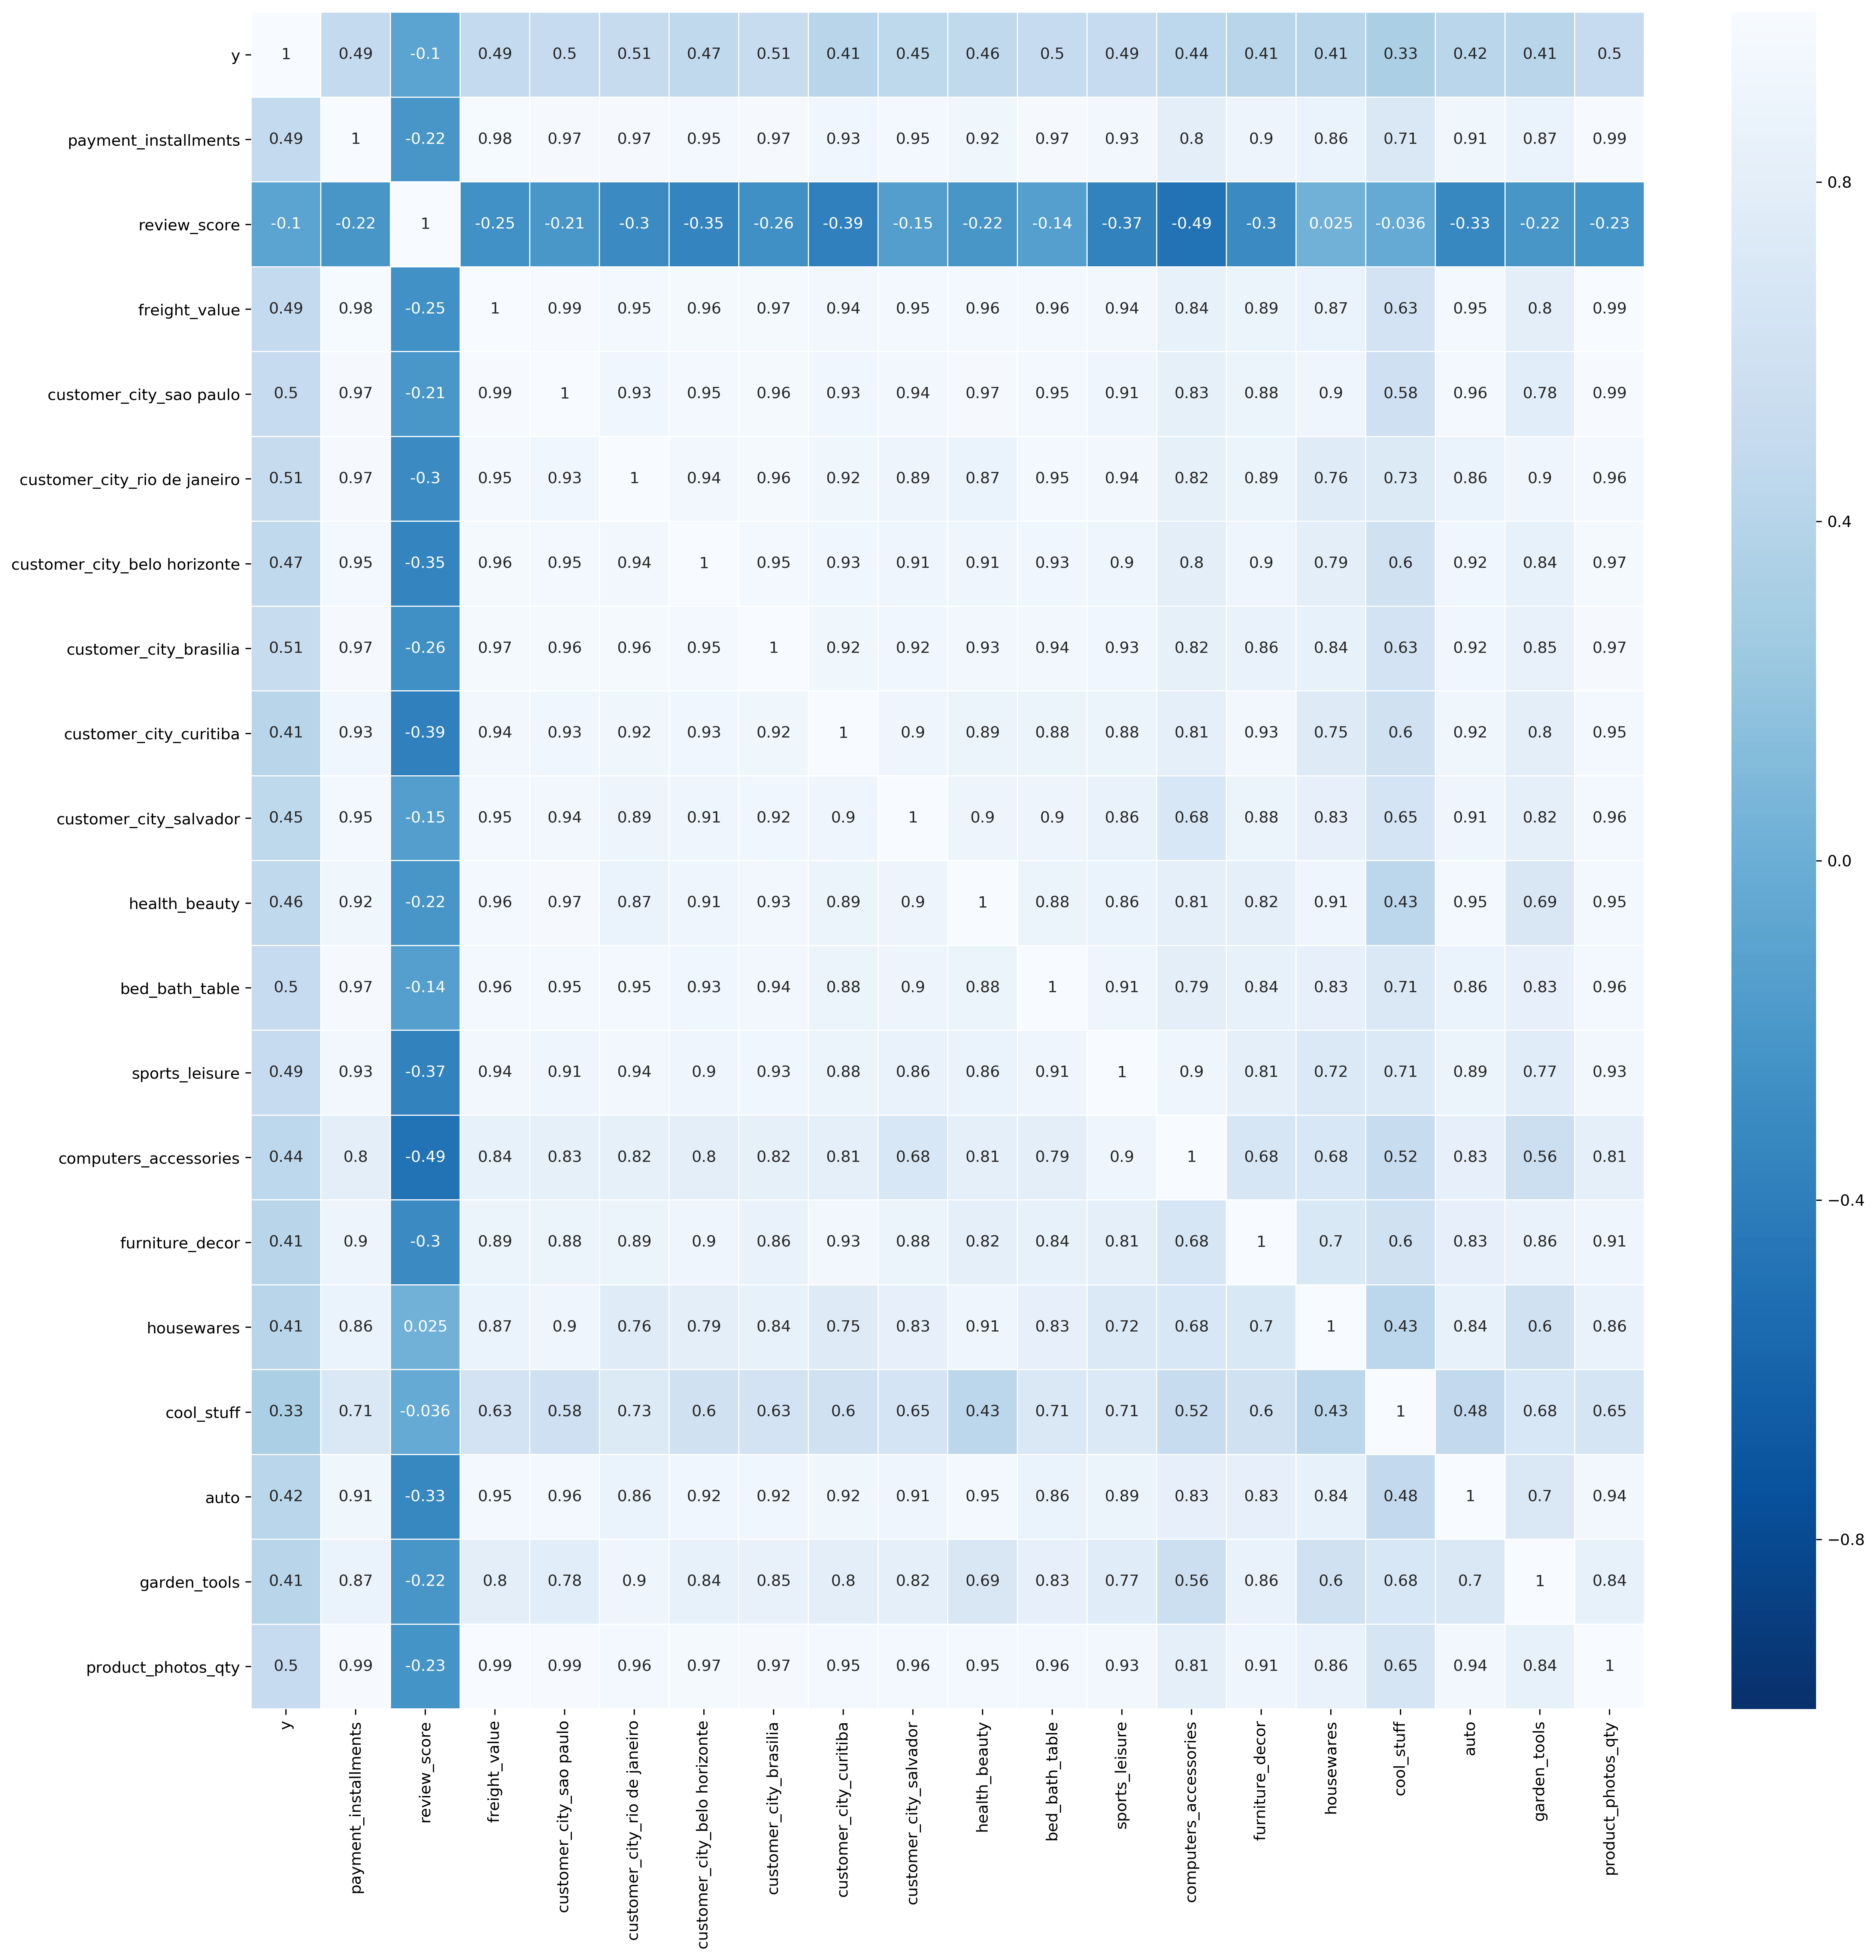

In [212]:
fig, ax = plt.subplots(1, 1, figsize = (20, 20), dpi=300)
#sns.axes_style('ticks')
sns.heatmap(data30_y60_mini_clean.corr(), annot=True, vmin=-1, vmax=1, linewidths=.5, cmap="Blues_r" );

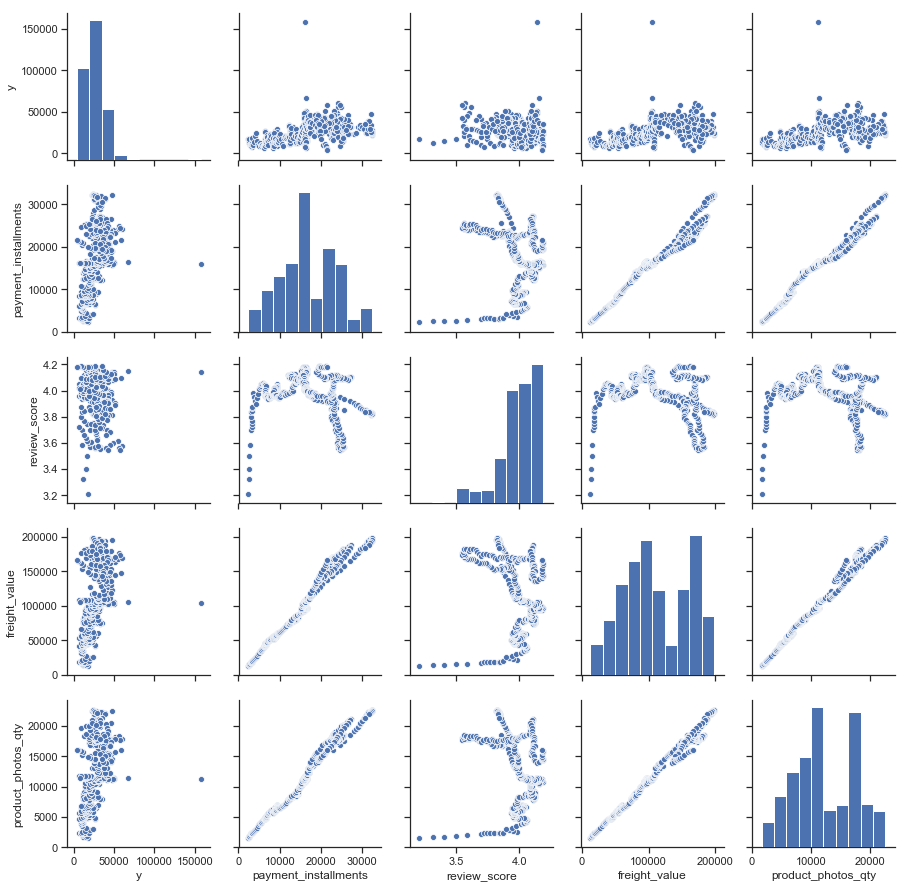

In [213]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(data30_y60_mini_clean, vars=["y", "payment_installments", 'review_score', 'freight_value',  "product_photos_qty"])

## LinearRegression, Ridge, Polynomial

In [255]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

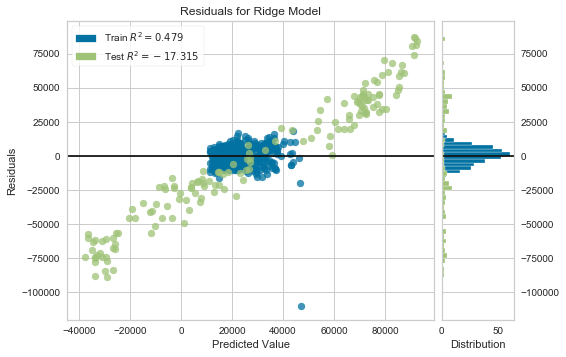

In [256]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

In [257]:
# fit OLS linear regression to training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
train_score= lr_model.score(X_train, y_train)    
# score fit model on test data
test_score = lr_model.score(X_test, y_test)
    
# create array of the y-predictions when model is run on validation data
y_pred = lr_model.predict(X_test)
    
# report results
print('\train R^2 score was:', train_score)
print('\ntest R^2 score was:', test_score)

	rain R^2 score was: 0.4795957656894275

test R^2 score was: -17.48086341960795


## Simple Train / Test Method:

In [260]:
lm = LinearRegression()
lm_reg = Ridge(alpha=1)
lm_poly = LinearRegression()
#Feature scaling for train and test so that we can run our ridge model on each
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)

#Feature transforms for train  and test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 
X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)


#how it does on test data:
lm.fit(X_train, y_train)
print(f'Linear Regression train R^2: {lm.score(X_train, y_train):.3f}')
print(f'Linear Regression test R^2: {lm.score(X_test, y_test):.3f}')

lm_reg.fit(X_train_scaled, y_train)
print(f'Ridge Regression train R^2: {lm_reg.score(X_train_scaled, y_train):.3f}')
print(f'Ridge Regression test R^2: {lm_reg.score(X_test_scaled , y_test):.3f}')

lm_poly.fit(X_train_poly, y_train)
print(f'Degree 2 Polynomial regression train R^2: {lm_poly.score(X_train_poly, y_train):.3f}')
print(f'Degree 2 polynomial regression test R^2: {lm_poly.score(X_test_poly, y_test):.3f}')

Linear Regression train R^2: 0.480
Linear Regression test R^2: -17.481
Ridge Regression train R^2: 0.469
Ridge Regression test R^2: -9.398
Degree 2 Polynomial regression train R^2: 0.838
Degree 2 polynomial regression test R^2: -22642.950


## Lasso Regularization

In [300]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import PolynomialFeatures

In [335]:
from sklearn.linear_model import lars_path
# Lasso without 
#selected_columns = ["ds", "payment_installments_sum", "payment_installments_mean", "review_score_sum", "review_score_mean", "y_sum", "y_mean", "freight_value_sum", "freight_value_mean", "customer_city_sao paulo_sum", 	...	product_category_name_english_housewares_mean	product_category_name_english_cool_stuff_sum	product_category_name_english_cool_stuff_mean	product_category_name_english_auto_sum	product_category_name_english_auto_mean	product_category_name_english_garden_tools_sum	product_category_name_english_garden_tools_mean	product_photos_qty_sum	product_photos_qty_mean	y]
lasso_model = Lasso(alpha = 300) 
## Scale the variables
std.fit(X_train.values)
lasso_model.fit(X_train_scaled, y_train)
print("Computing regularization path using the LARS ...")
alphas, _, coefs = lars_path(X_tr, y_train.values, method='lasso')
xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

Computing regularization path using the LARS ...


In [336]:
print(f'Lasso Regularization train R^2: {lasso_model.score(X_train_scaled, y_train):.3f}')
print(f'Lasso Regularization test R^2: {lasso_model.score(X_test_scaled, y_test):.3f}')

Lasso Regularization train R^2: 0.346
Lasso Regularization test R^2: -0.261


In [337]:
# Find the MAE and R^2 on the test set using this model

print('mae = ', mean_absolute_error(y_test, test_set_pred))
print('mse = ', mean_squared_error(y_test, test_set_pred))
print('rmse = ', np.sqrt(mean_squared_error(y_test, test_set_pred)))

mae =  1818225.1657212786
mse =  3399876044504.469
rmse =  1843875.2789992248


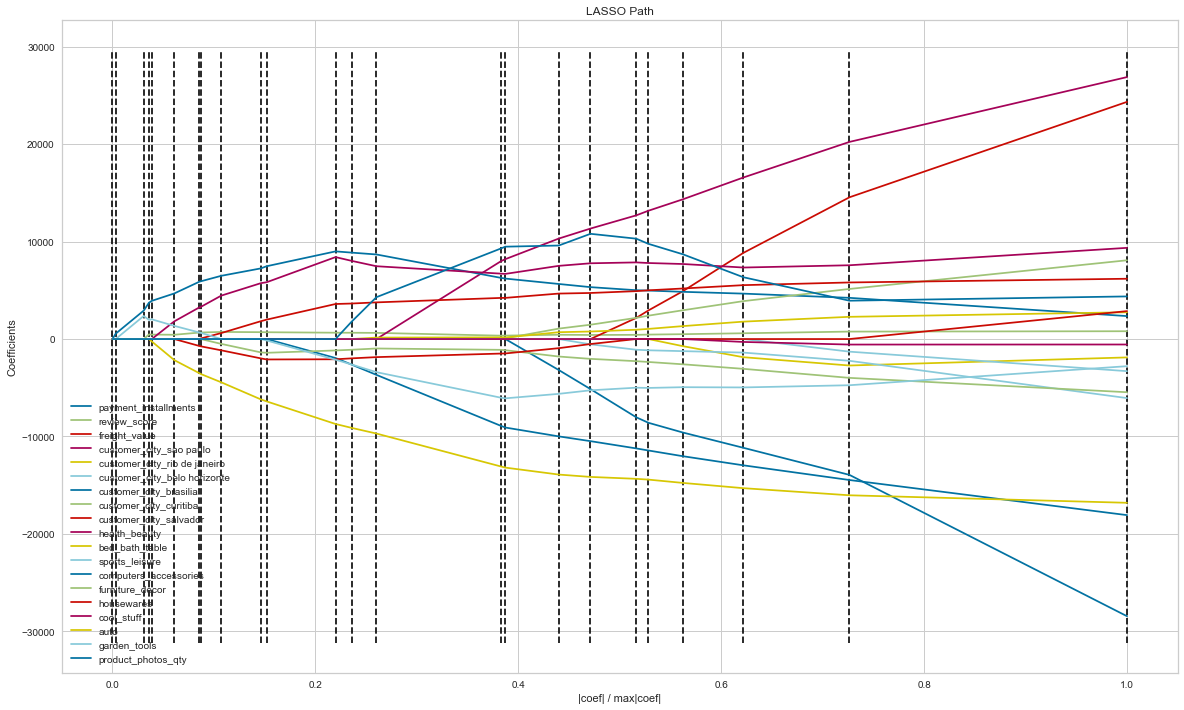

In [338]:
plt.figure(figsize=(20,12))
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train.columns)
plt.show()

In [339]:
# print lasso coef using transformed data
list(zip(X_train.columns, lasso_model.coef_))

[('payment_installments', -0.0),
 ('review_score', 725.346763438398),
 ('freight_value', 0.0),
 ('customer_city_sao paulo', 0.0),
 ('customer_city_rio de janeiro', 0.0),
 ('customer_city_belo horizonte', -0.0),
 ('customer_city_brasilia', 6623.20323822254),
 ('customer_city_curitiba', -0.0),
 ('customer_city_salvador', 805.8535404061118),
 ('health_beauty', 4653.017880767485),
 ('bed_bath_table', 0.0),
 ('sports_leisure', 0.0),
 ('computers_accessories', -0.0),
 ('furniture_decor', -639.1058299594239),
 ('housewares', -1293.898860118802),
 ('cool_stuff', -0.0),
 ('auto', -4718.187717621867),
 ('garden_tools', -0.0),
 ('product_photos_qty', 0.0)]

In [340]:
df_lasso2 = pd.DataFrame(list(zip(X_train.columns, lasso_model.coef_)), columns=["coef", "count"])
df_lasso2.sort_values("count", ascending=False, inplace=True)
df_lasso2.index = range(len(df_lasso2))
df_lasso2

,coef,count
0,customer_city_brasilia,6623.203238
1,health_beauty,4653.017881
2,customer_city_salvador,805.853540
3,review_score,725.346763
4,garden_tools,-0.000000
5,cool_stuff,-0.000000
6,computers_accessories,-0.000000
7,sports_leisure,0.000000
8,bed_bath_table,0.000000
9,payment_installments,-0.000000
